In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
file_path = '/content/drive/MyDrive/22. comment_project/save_files'

# 2. 이벤트 스코어의 작성

### 전체 데이터 - 명사 출현빈도, stopwords

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None) ## 모든 열을 출력한다.
pd.set_option('display.max_rows', None)


df1 = pd.read_csv("/content/drive/MyDrive/22. comment_project/chat_data_procecced/chat_data_2023_02_06_Tottenham_Manchester_n_t.csv", index_col=0)
df2 =pd.read_csv("/content/drive/MyDrive/22. comment_project/chat_data_procecced/chat_data_2023_02_20_Tottenham_WestHam_n_t.csv", index_col=0)
df3 =pd.read_csv("/content/drive/MyDrive/22. comment_project/chat_data_procecced/chat_data_2023_03_19_Tottenham_Southhampton_n_t.csv", index_col=0)
df4 =pd.read_csv("/content/drive/MyDrive/22. comment_project/chat_data_procecced/chat_data_2023_03_24_Korea_Colombia_corrected_n_t.csv", index_col=0)
df5 =pd.read_csv("/content/drive/MyDrive/22. comment_project/chat_data_procecced/chat_data_2023_04_04_Everton_Tottenhan_corrected_n_t.csv", index_col=0)

df = pd.concat([df1, df2, df3, df4, df5])
df = df.drop(0)
print(df.head())
print(len(df))

          id                      comment                 time  \
1   Hyun Kim                        안녕하세요  2023-02-06 01:16:47   
2  식스맨TV축구해설                    안녕하세요~~^^  2023-02-06 01:17:05   
3    사빌sable                        안녕하세요  2023-02-06 01:18:16   
4    DDandME                식스맨님 항상 고맙습니다  2023-02-06 01:18:47   
5        황박연  울 식스맨님~~~~~~~~~~~~~~~~~~^^*  2023-02-06 01:18:55   

  corrected_comment              nouns  time_minutes  
1             안녕하세요                 []         4.300  
2             안녕하세요                 []         4.600  
3             안녕하세요                 []         5.783  
4     식스맨님 항상 고맙습니다  ['식스', '맨', '항상']         6.300  
5            울 식스맨님   ['울', '식스', '맨']         6.433  
25011


In [4]:
import ast
df["nouns"] = df["nouns"].apply(lambda x: ast.literal_eval(x))
df.head()

,id,comment,time,corrected_comment,nouns,time_minutes
1,Hyun Kim,안녕하세요,2023-02-06 01:16:47,안녕하세요,[],4.300
2,식스맨TV축구해설,안녕하세요~~^^,2023-02-06 01:17:05,안녕하세요,[],4.600
3,사빌sable,안녕하세요,2023-02-06 01:18:16,안녕하세요,[],5.783
4,DDandME,식스맨님 항상 고맙습니다,2023-02-06 01:18:47,식스맨님 항상 고맙습니다,"[식스, 맨, 항상]",6.300
5,황박연,울 식스맨님~~~~~~~~~~~~~~~~~~^^*,2023-02-06 01:18:55,울 식스맨님,"[울, 식스, 맨]",6.433


In [5]:
game_nouns_list=[]
for list in df["nouns"]:
    game_nouns_list.extend(list)

print(game_nouns_list)


['식스', '맨', '항상', '울', '식스', '맨', '꾹', '방가', '방가', '울', '유미', '또', '박연', '모자', '울', '식스', '맨', '요즘', '우레이', '날', '두보', '나은', '거', '걘', '인성', '지하', '또', '해트트릭', '골', '성원', '장님', '방가', '방가', '어서', '울', '김', '나야', '식스', '맨', '오늘', '캐나다', '가즈', '또', '봬', '어서', '오늘', '부디', '동우', '어서', '네', '울', '유미', '황', '박연', '손흥민', '파이팅', '리하', '울', '윤정숙', '어서', '윤정숙', '어서', '구독', '클릭', '클릭', '박연', '만이', '식스', '맨', '꾹', '울', '김', '나야', '님', '새삼', '구독', '클릭', '클릭', '오늘', '파이팅', '구독', '클릭', '클릭', '손흥민', '선수', '파이팅', '구독', '식스', '맨', '힘', '사랑', '한빛', '어서', '황', '박연', '마야', '파이팅', '오늘', '김민재', '이강인', '어제', '또', '황민', '찬위', '손흥민', '승리', '울', '윤정숙', '늘', '지민', '울', '김지민', '후반', '포로', '애', '좀', '일찍', '중계', '시작', '제일', '사자왕', '어서', '만', '구독', '클릭', '클릭', '승리', '희망', '울', '김지민', '늘', '사랑', '거', '아시', '구독', '클릭', '클릭', '안', '자고', '지민', '지민', '제로', '타깃', '입장', '구독', '클릭', '클릭', '찬', '부상', '걱정', '요', '지민', '사진', '구독', '클릭', '클릭', '은정', '어서', '식스', '맨', '파이팅', '출첵', '이모티콘', '잘못', '죄송', '제로', '타겟', '페리', '선발', '토트넘', 

In [6]:
from collections import Counter
counts = Counter(game_nouns_list)
print(counts)
print(len(counts))

Counter({'골': 2680, '페리': 1752, '손흥민': 1289, '오늘': 950, '안': 877, '케인': 820, '토트넘': 809, '식스': 639, '맨': 633, '흥민': 609, '경기': 599, '거': 575, '손': 535, '왜': 524, '콩테': 489, '호': 474, '선수': 422, '좀': 422, '치': 421, '파이팅': 407, '중계': 394, '진짜': 385, '부상': 365, '어서': 359, '수고': 351, '수비': 330, '더': 320, '응원': 318, '클릭': 312, '포로': 307, '듯': 306, '패스': 292, '제발': 292, '못': 291, '교체': 276, '또': 261, '가즈': 260, '것': 240, '이강인': 233, '때': 233, '이': 227, '팀': 224, '역시': 219, '구독': 217, '뭐': 215, '소니': 214, '보고': 214, '축구': 211, '게': 206, '로열': 203, '우리': 203, '저': 202, '요': 199, '감독': 190, '후반': 189, '어시': 184, '그냥': 184, '모우': 181, '히샬': 180, '누가': 177, '김민재': 174, '이제': 171, '수': 166, '놈': 164, '흥': 162, '해': 153, '콜롬비아': 153, '심판': 150, '카나': 149, '번': 146, '벤치': 143, '위': 142, '방가': 139, '선발': 138, '최고': 135, '민아': 134, '조선': 133, '오': 132, '로메': 131, '시간': 130, '욕심': 130, '정말': 129, '울': 126, '전': 125, '나폴리': 124, '볼': 123, '해설': 123, '채널': 123, '대한민국': 123, '나': 122, '맨시티': 122, '규': 121

In [7]:
filtered_counts = {word: count for word, count in counts.items() if (count > 20 and (len(word)>1 or word == '골')) }

filtered_counts = sorted(filtered_counts.items(), key=lambda x: x[1], reverse=True)
print(filtered_counts)
print(len(filtered_counts))

[('골', 2680), ('페리', 1752), ('손흥민', 1289), ('오늘', 950), ('케인', 820), ('토트넘', 809), ('식스', 639), ('흥민', 609), ('경기', 599), ('콩테', 489), ('선수', 422), ('파이팅', 407), ('중계', 394), ('진짜', 385), ('부상', 365), ('어서', 359), ('수고', 351), ('수비', 330), ('응원', 318), ('클릭', 312), ('포로', 307), ('패스', 292), ('제발', 292), ('교체', 276), ('가즈', 260), ('이강인', 233), ('역시', 219), ('구독', 217), ('소니', 214), ('보고', 214), ('축구', 211), ('로열', 203), ('우리', 203), ('감독', 190), ('후반', 189), ('어시', 184), ('그냥', 184), ('모우', 181), ('히샬', 180), ('누가', 177), ('김민재', 174), ('이제', 171), ('콜롬비아', 153), ('심판', 150), ('카나', 149), ('벤치', 143), ('방가', 139), ('선발', 138), ('최고', 135), ('민아', 134), ('조선', 133), ('로메', 131), ('시간', 130), ('욕심', 130), ('정말', 129), ('나폴리', 124), ('해설', 123), ('채널', 123), ('대한민국', 123), ('맨시티', 122), ('플레이', 118), ('강인', 114), ('한국', 113), ('시즌', 111), ('리스', 110), ('지금', 109), ('벤뎁', 109), ('공격', 107), ('시작', 106), ('민재', 106), ('하나', 102), ('쿠팡', 100), ('전반', 96), ('사람', 95), ('이적', 94), ('크로스', 93), 

In [8]:
### stop_words 더 추가하기

stop_words = ['클릭', '방가', '방송', '유투브', '목소리', '티브이', '때문', '이기', '언제', '항상', '영상', '건가', '하나요',
              '일루', '자기', '시차', '가요', '일정', '하이', '후원', '화면', '이건', '유료', '나야', '거임', '저건']

filtered_counts_noStopwords = [(word, count) for word, count in filtered_counts if word not in stop_words]
print(filtered_counts_noStopwords)
print(len(filtered_counts_noStopwords))


[('골', 2680), ('페리', 1752), ('손흥민', 1289), ('오늘', 950), ('케인', 820), ('토트넘', 809), ('식스', 639), ('흥민', 609), ('경기', 599), ('콩테', 489), ('선수', 422), ('파이팅', 407), ('중계', 394), ('진짜', 385), ('부상', 365), ('어서', 359), ('수고', 351), ('수비', 330), ('응원', 318), ('포로', 307), ('패스', 292), ('제발', 292), ('교체', 276), ('가즈', 260), ('이강인', 233), ('역시', 219), ('구독', 217), ('소니', 214), ('보고', 214), ('축구', 211), ('로열', 203), ('우리', 203), ('감독', 190), ('후반', 189), ('어시', 184), ('그냥', 184), ('모우', 181), ('히샬', 180), ('누가', 177), ('김민재', 174), ('이제', 171), ('콜롬비아', 153), ('심판', 150), ('카나', 149), ('벤치', 143), ('선발', 138), ('최고', 135), ('민아', 134), ('조선', 133), ('로메', 131), ('시간', 130), ('욕심', 130), ('정말', 129), ('나폴리', 124), ('해설', 123), ('채널', 123), ('대한민국', 123), ('맨시티', 122), ('플레이', 118), ('강인', 114), ('한국', 113), ('시즌', 111), ('리스', 110), ('지금', 109), ('벤뎁', 109), ('공격', 107), ('시작', 106), ('민재', 106), ('하나', 102), ('쿠팡', 100), ('전반', 96), ('사람', 95), ('이적', 94), ('크로스', 93), ('퇴장', 93), ('포스터', 91), (

---

---

### dtm 만들기, 시간의 '분' 단위의 group_df 만들기

In [9]:

# 이중괄호 푸는 함수
def filtered_flatten(lst):
  result = []
  for item in lst:
    result.extend(item)
  return result


# 분 단위의 데이터로 만들기 (grouped_df)
def df_processing(df):
  # 유효한 단어가 아니면 삭제하기(nouns_filtered)
  filtered_words = [word for word, count in filtered_counts_noStopwords]
  df['nouns_filtered'] = df['nouns'].apply(lambda x: [x for x in ast.literal_eval(x) if x in filtered_words])

  # time_minutes를 1분 간격으로 설정
  df['minutes'] = df['time_minutes'].apply(lambda x: int(x))
  # 동일한 분에 대한 데이터를 같은 행으로 처리하고 데이터를 리스트로 그룹화
  grouped_df = df.groupby('minutes').agg({
      'id': lambda x: x.tolist(),
      'comment': lambda x: x.tolist(),
      'time': lambda x: x.tolist(),
      'time_minutes' : lambda x: x.tolist(),
      'corrected_comment': lambda x: x.tolist(),
      'nouns': lambda x: x.tolist(),
      'nouns_filtered' :lambda x: x.tolist()
  }).reset_index()

  grouped_df["nouns_filtered_flatten"] = grouped_df["nouns_filtered"].apply(filtered_flatten)

  # 이벤트 시점 지정하기
  event_times = [time for x in real_event_times for time in (x, x+1, x+2)]

  for i, row in grouped_df.iterrows():
    if row["minutes"] in event_times:
      grouped_df.at[i, "event"] = 1
    else:
      grouped_df.at[i, "event"] = 0

  return grouped_df



# dtm 만들기,  Bag of Words 모델을 구축
def dtm_df(grouped_df):

  # 전체 단어에 대한 인덱스를 구축
  global_word2index = {}
  for i, r in grouped_df.iterrows():
      for voca in r["nouns_filtered_flatten"]:
          if voca not in global_word2index:
              global_word2index[voca] = len(global_word2index)

  # 각 행에 대한 문서-단어 행렬을 생성
  dtm = []
  for i, r in grouped_df.iterrows():
      bow = [0] * len(global_word2index)  # 모든 단어에 대해 빈도수 0으로 초기화
      for voca in r["nouns_filtered_flatten"]:
          index = global_word2index[voca]  # 단어의 글로벌 인덱스
          bow[index] += 1  # 해당 인덱스의 빈도수 증가
      dtm.append(bow)

  # pandas DataFrame으로 변환
  dtm_df = pd.DataFrame(dtm, columns=[key for key, value in sorted(global_word2index.items(), key=lambda item: item[1])])

  return dtm_df

# 각 경기의 grouped_df, dtm_df 만들기

real_event_times = [123, 145]
grouped_df_5 = df_processing(df5)
dtm_df_5 = dtm_df(grouped_df_5)

real_event_times = [44, 80, 97, 100]
grouped_df_4 = df_processing(df4)
dtm_df_4 = dtm_df(grouped_df_4)

real_event_times = [101, 124, 142, 152, 155, 168]
grouped_df_3 = df_processing(df3)
dtm_df_3 = dtm_df(grouped_df_3)

real_event_times = [127, 143]
grouped_df_2 = df_processing(df2)
dtm_df_2 = dtm_df(grouped_df_2)

real_event_times = [32]
grouped_df_1 = df_processing(df1)
dtm_df_1 = dtm_df(grouped_df_1)

### 오즈비 구하기
- ab_event_score
- relative_event_score(상대빈도를 이용한)

In [10]:

# # 오즈비 구하는 함수


def odds_ratio_each(dtm_df, grouped_df):

  # 단어별 오즈비 구하기
  df_odds = pd.DataFrame()

  feature_names = dtm_df.columns.sort_values()
  df_odds['nouns'] = feature_names

  # sum_all = dtm.sum(axis=0).A1
  # df_odds['sum_all'] = sum_all

  df_odds['event_present'] = None
  df_odds['event_not_present'] = None
  df_odds['not_event_present'] = None
  df_odds['not_event_not_present'] = None


  # 이벤트가 있는 경우 각 명사가 포함된 행의 수를 계산
  df_odds['event_present'] = df_odds['nouns'].apply(
      lambda x: grouped_df[(grouped_df['event'] == 1) & (grouped_df['nouns_filtered_flatten'].apply(lambda y: x in y))].shape[0]
  )

  df_odds['event_not_present'] = df_odds['nouns'].apply(
    lambda x: grouped_df[(grouped_df['event'] == 1) & (~grouped_df['nouns_filtered_flatten'].apply(lambda y: x in y))].shape[0]
  )

  df_odds['not_event_present'] = df_odds['nouns'].apply(
      lambda x: grouped_df[(grouped_df['event'] == 0) & (grouped_df['nouns_filtered_flatten'].apply(lambda y: x in y))].shape[0]
  )

  df_odds['not_event_not_present'] = df_odds['nouns'].apply(
    lambda x: grouped_df[(grouped_df['event'] == 0) & (~grouped_df['nouns_filtered_flatten'].apply(lambda y: x in y))].shape[0]
  )

  # import numpy as np
  # df_odds["sum"] = df_odds["event_present"] + df_odds["event_not_present"] + df_odds["not_event_present"] + df_odds["not_event_not_present"]


  odds_ratio = (df_odds["event_present"] * df_odds["not_event_not_present"]) / (df_odds["event_not_present"] * df_odds["not_event_present"]+ 0.0001)  # 분모가 0이 되는 것을 방지
  df_odds["odds_ratio"]  = np.log(odds_ratio.clip(lower=0.0001)) # 로그 계산 시 음수를 방지하기 위해 clip 사용
  df_odds = df_odds.sort_values(by = "odds_ratio", ascending = False)

  return df_odds


import numpy as np

# odds ratio : 경기마다 각각

odds_ratio_5 = odds_ratio_each(dtm_df_5, grouped_df_5)
odds_ratio_4 = odds_ratio_each(dtm_df_4, grouped_df_4)
odds_ratio_3 = odds_ratio_each(dtm_df_3, grouped_df_3)
odds_ratio_2 = odds_ratio_each(dtm_df_2, grouped_df_2)
odds_ratio_1 = odds_ratio_each(dtm_df_1, grouped_df_1)


In [11]:
# event score 구하기

def event_score(odds_ratio, dtm_df, grouped_df):

  # odds_ratio_1의 odds_ratio 열을  array로 변환
  odds_ratio_array = odds_ratio['odds_ratio'].values

  # 순서대로 정렬 : 오즈비 순으로
  dtm_df = dtm_df[odds_ratio["nouns"].to_list()]

  # odds_ratios 배열을 dtm_df_1의 각 열에 곱함
  mul_matrix = dtm_df.mul(odds_ratio_array, axis=1) # 행방향으로 곱해줌

  event_score = mul_matrix.sum(axis=1).array


  time = grouped_df["minutes"].array

  df_score = pd.DataFrame()
  df_score["time"] = time
  df_score["event_score"] = event_score

  return df_score


df_score_1 = event_score(odds_ratio_1, dtm_df_1, grouped_df_1)
df_score_2 = event_score(odds_ratio_2, dtm_df_2, grouped_df_2)
df_score_3 = event_score(odds_ratio_3, dtm_df_3, grouped_df_3)
df_score_4 = event_score(odds_ratio_4, dtm_df_4, grouped_df_4)
df_score_5 = event_score(odds_ratio_5, dtm_df_5, grouped_df_5)

In [12]:
# 상대출현빈도 event score 구하기

def relative_event_score(odds_ratio, dtm_df, grouped_df):

  # odds_ratio_1의 odds_ratio 열을  array로 변환
  odds_ratio_array = odds_ratio['odds_ratio'].values

  row_sum = dtm_df.sum(axis=1).array
  relative_dtm = dtm_df.div(row_sum, axis=0)


  # 순서대로 정렬 : 오즈비 순으로
  relative_dtm = relative_dtm[odds_ratio["nouns"].to_list()]

  # odds_ratios 배열을 relative_dtm_1의 각 열에 곱함
  mul_matrix = relative_dtm.mul(odds_ratio_array, axis=1) # 행방향으로 곱해줌

  event_score = mul_matrix.sum(axis=1).array


  time = grouped_df["minutes"].array

  df_score = pd.DataFrame()
  df_score["time"] = time
  df_score["event_score"] = event_score

  return df_score


relative_df_score_1 = relative_event_score(odds_ratio_1, dtm_df_1, grouped_df_1)
relative_df_score_2 = relative_event_score(odds_ratio_2, dtm_df_2, grouped_df_2)
relative_df_score_3 = relative_event_score(odds_ratio_3, dtm_df_3, grouped_df_3)
relative_df_score_4 = relative_event_score(odds_ratio_4, dtm_df_4, grouped_df_4)
relative_df_score_5 = relative_event_score(odds_ratio_5, dtm_df_5, grouped_df_5)

In [13]:
# 댓글 수 (분 단위)

all_grouped_df = [grouped_df_1, grouped_df_2, grouped_df_3, grouped_df_4, grouped_df_5]
for grouped_df in all_grouped_df:
  grouped_df["comment_cnt"] = grouped_df["comment"].apply(lambda x: len(x))
  print(grouped_df["comment_cnt"].head())

0     1
1     2
2     1
3     6
4    25
Name: comment_cnt, dtype: int64
0    1
1    1
2    2
3    1
4    2
Name: comment_cnt, dtype: int64
0    1
1    1
2    1
3    3
4    1
Name: comment_cnt, dtype: int64
0     7
1    11
2     5
3    11
4    17
Name: comment_cnt, dtype: int64
0    1
1    2
2    1
3    1
4    1
Name: comment_cnt, dtype: int64


In [14]:
grouped_df_1.head()

,minutes,id,comment,time,time_minutes,corrected_comment,nouns,nouns_filtered,nouns_filtered_flatten,event,comment_cnt
0,0,[식스맨TV축구해설],[라인업 - 손흥민 케인 클루셉스키 페리시치 벤탄쿠르 호이비에르 로얄 데이비스 다이...,[2023-02-06 01:12:29],[0.0],[라인업 손흥민 케인 클루셉스키 페리시치 벤탄쿠르 호이지에 르 로열 데이비스 다이...,"[['라인업', '손흥민', '케인', '클루', '스키', '페리', '치', '...","[[라인업, 손흥민, 케인, 페리, 이지, 로열, 데이비스, 로메, 리스, 주마, ...","[라인업, 손흥민, 케인, 페리, 이지, 로열, 데이비스, 로메, 리스, 주마, 히...",0.0,1
1,4,"[Hyun Kim, 식스맨TV축구해설]","[안녕하세요, 안녕하세요~~^^]","[2023-02-06 01:16:47, 2023-02-06 01:17:05]","[4.3, 4.6]","[안녕하세요, 안녕하세요]","[[], []]","[[], []]",[],0.0,2
2,5,[사빌sable],[안녕하세요],[2023-02-06 01:18:16],[5.783],[안녕하세요],[[]],[[]],[],0.0,1
3,6,"[DDandME, 황박연, 황박연, 황박연, 서유미, 황박연]","[식스맨님 항상 고맙습니다, 울 식스맨님~~~~~~~~~~~~~~~~~~^^*, 짜...","[2023-02-06 01:18:47, 2023-02-06 01:18:55, 202...","[6.3, 6.433, 6.6, 6.733, 6.767, 6.933]","[식스맨님 항상 고맙습니다, 울 식스맨님, 짜잔, 좋아요 꾹, 방가방가, 울 서유미 님]","[['식스', '맨', '항상'], ['울', '식스', '맨'], [], ['꾹'...","[[식스], [식스], [], [], [], [유미]]","[식스, 식스, 유미]",0.0,6
4,7,"[김마야📣, 서유미, 봄봄, 황박연, 박종호, 미남 샬랴, 사빌sable, 황인성미...","[또 보내요 ㅎㅎ, 박연님 반갑습니다, 안녕하세요^^, 우와~~모자를 벗는 울 잘생...","[2023-02-06 01:19:35, 2023-02-06 01:19:38, 202...","[7.1, 7.15, 7.2, 7.217, 7.25, 7.283, 7.3, 7.31...","[또 보내요 , 박연 님 반갑습니다, 안녕하세요, 우와 모자를 벗는 울 잘생긴 식스...","[['또'], ['박연'], [], ['모자', '울', '식스', '맨'], ['...","[[], [박연], [], [식스], [요즘], [], [해트트릭, 골], [], ...","[박연, 식스, 요즘, 해트트릭, 골, 어서, 식스, 오늘, 가즈, 어서, 오늘, ...",0.0,25


### 그래프 그리기

- 댓글 수
- 출현빈도 * 로그오즈비
- 상대 출현빈도 * 로그오즈비


In [15]:


comment_df_list = [grouped_df_1, grouped_df_2, grouped_df_3, grouped_df_4, grouped_df_5]
# grouped_df['minutes'], grouped_df['comment_cnt']

ab_df_list = [df_score_1, df_score_2, df_score_3, df_score_4, df_score_5]
# df_score['time'], df_score['event_score']

rel_df_list = [relative_df_score_1, relative_df_score_2, relative_df_score_3, relative_df_score_4, relative_df_score_5]
# df_score['time'], df_score['event_score']



# data_df_list 정의

data_df_list = {'comment_df_list' : comment_df_list,
                'ab_df_list' : ab_df_list,
                'rel_df_list' : rel_df_list}


# grouped_df_list = [grouped_df_1, grouped_df_2, grouped_df_3, grouped_df_4, grouped_df_5]

for comment_df in comment_df_list :
  comment_df['time'] = comment_df['minutes']
  comment_df['event_score'] = comment_df['comment_cnt']

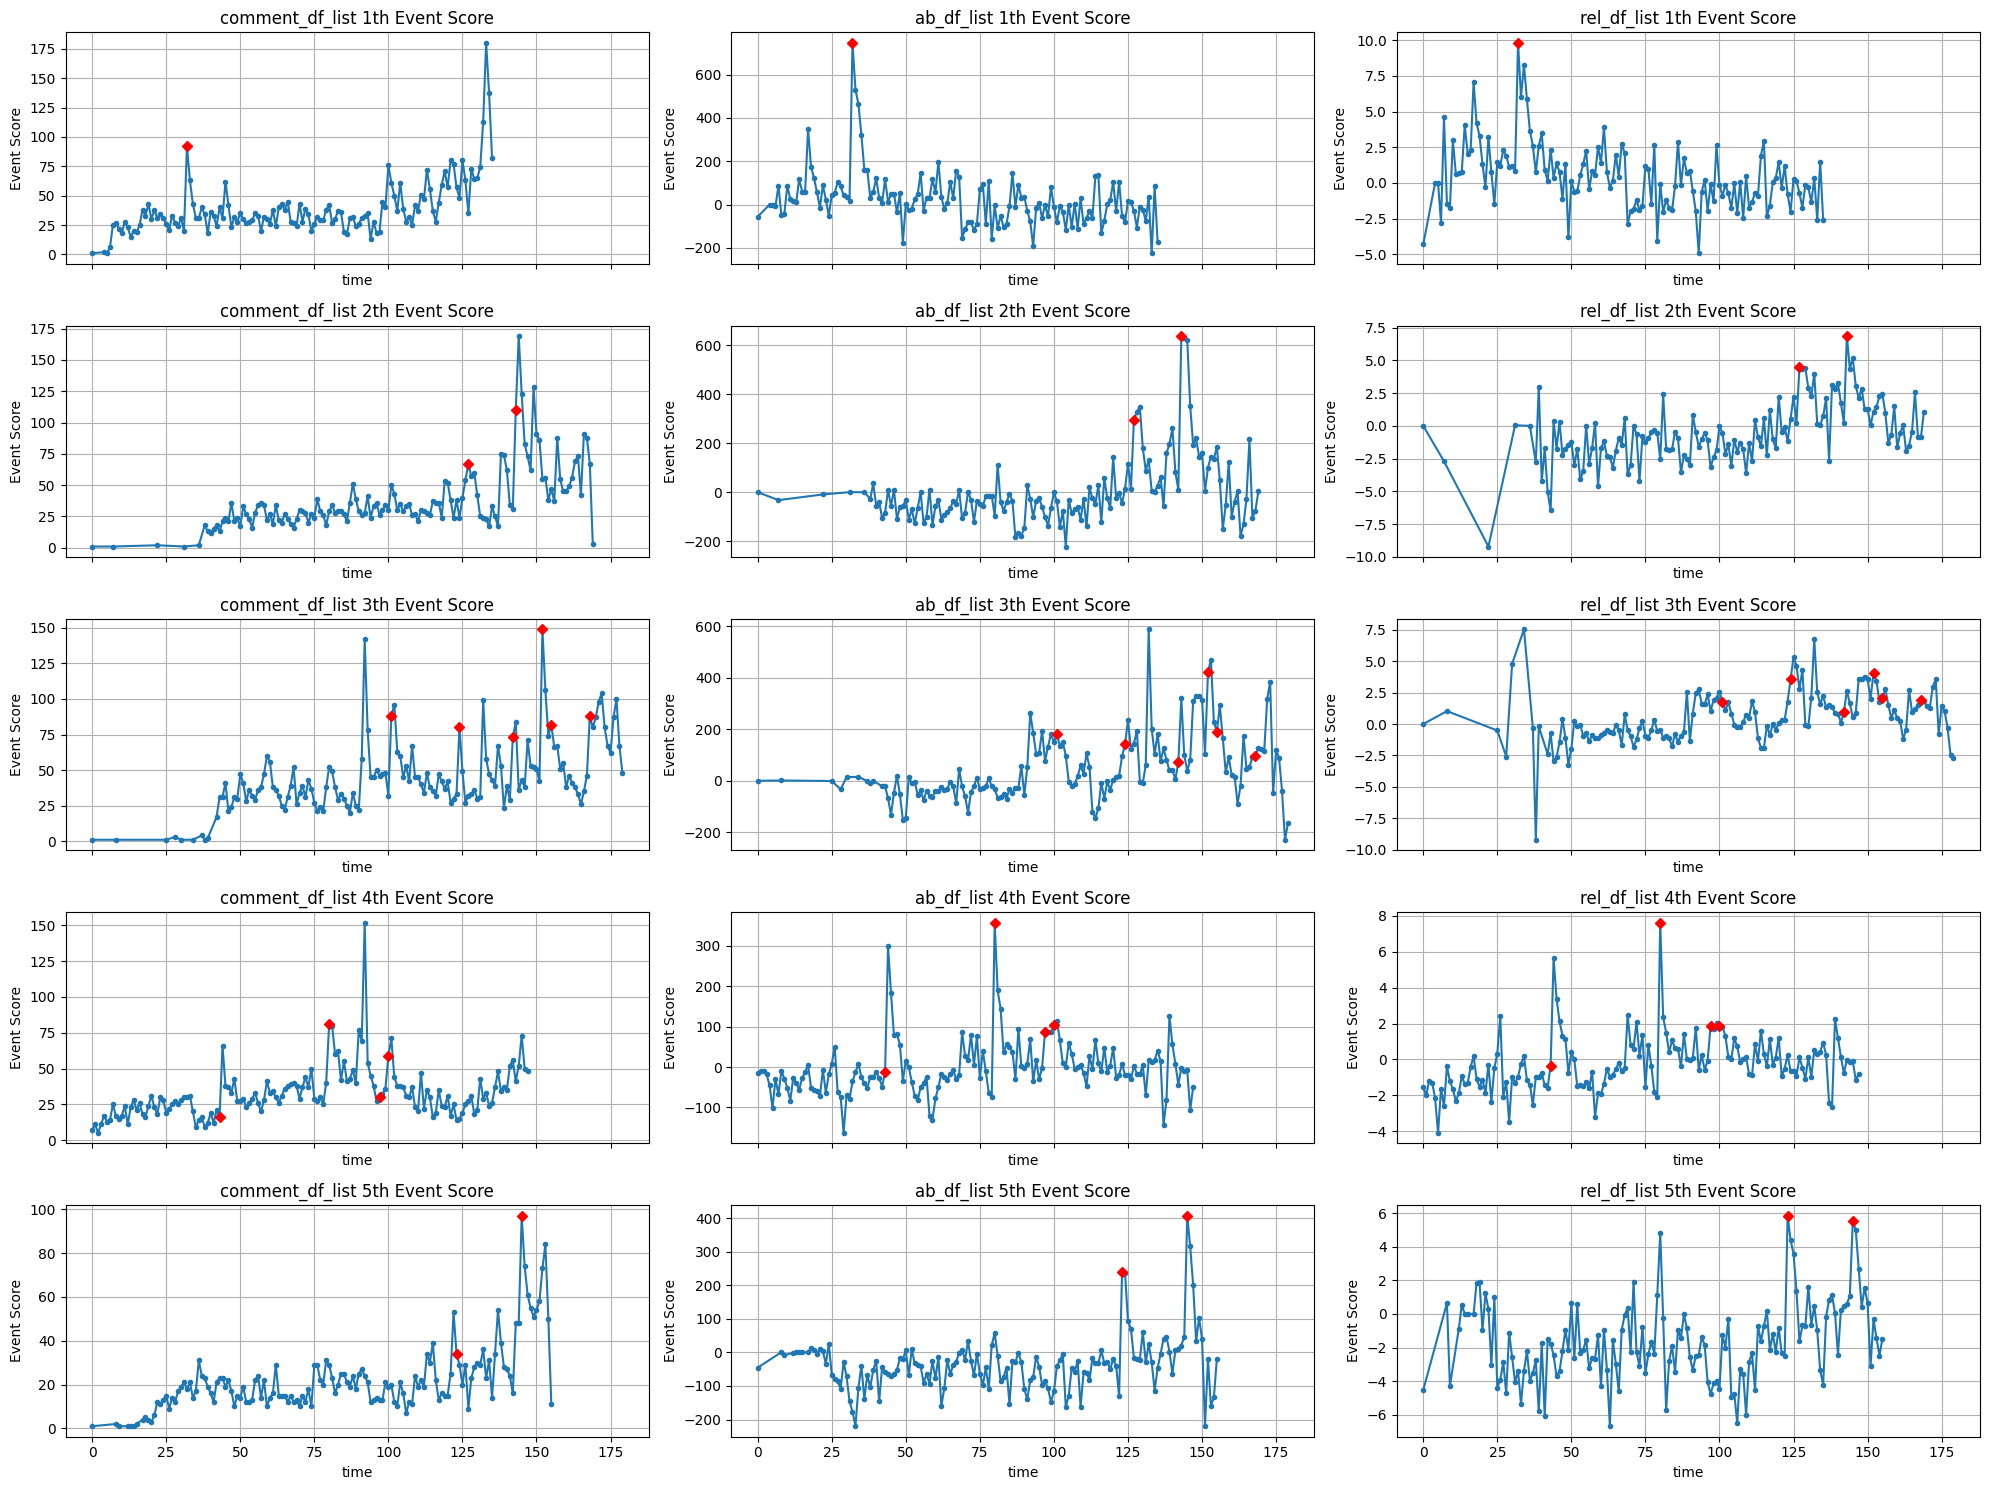

In [16]:
# 댓글 수

import matplotlib.pyplot as plt

# 모든 matplotlib 설정을 기본값으로 리셋
plt.rcParams.update(plt.rcParamsDefault)


def plot_data_df(ax,data_df_name, data_df):


    # 그래프 그리기
    ax.plot(data_df['time'], data_df['event_score'], marker='o', linestyle='-', markersize =3)  # 선 그래프로 표현
    ax.set_title(f'{data_df_name} {i%5 +1}th Event Score')  # 그래프 제목 설정
    ax.set_xlabel('time')  # x축 레이블
    ax.set_ylabel('Event Score')  # y축 레이블
    ax.grid(True)  # 그리드 표시

    # 특정 축에 빨간색 다이아몬드 점 추가
    if i%5 == 0:
        ax.plot([32], [data_df.loc[data_df['time'] == 32, 'event_score'].iloc[0]],
                    marker='D', markersize=5, color='red', linestyle='')

    elif i%5 == 1:
        ax.plot([127, 143], [data_df.loc[data_df['time'] == 127, 'event_score'].iloc[0],
                                  data_df.loc[data_df['time'] == 143, 'event_score'].iloc[0]],
                    marker='D', markersize=5, color='red', linestyle='')

    elif i%5 == 2:
        times = [101, 124, 142, 152, 155, 168]
        scores = [data_df.loc[data_df['time'] == time, 'event_score'].iloc[0] for time in times]
        ax.plot(times, scores, marker='D', markersize=5, color='red', linestyle='')

    elif i%5 == 3:
        times = [43, 80, 97, 100]
        scores = [data_df.loc[data_df['time'] == time, 'event_score'].iloc[0] for time in times]
        ax.plot(times, scores, marker='D', markersize=5, color='red', linestyle='')

    elif i%5 == 4:
        times = [123, 145]
        scores = [data_df.loc[data_df['time'] == time, 'event_score'].iloc[0] for time in times]
        ax.plot(times, scores, marker='D', markersize=5, color='red', linestyle='')

# 5행 3열 그리드 생성
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 15), sharex=True, sharey=False)

# 플롯 그리기
i = 0
for (data_df_name, data_df) in data_df_list.items():
  for df in data_df:
    # 열 우선 인덱싱으로 행과 열 결정
    col = i // 5  # 열 인덱스
    row = i % 5   # 행 인덱스

    # 축 선택
    ax = axes[row, col]

    plot_data_df(ax, data_df_name, df)
    i += 1
    if i >= 15:  # 최대 15개의 플롯만 그림
        break

plt.tight_layout()  # subplot 간격 자동 조정
plt.show()  # 모든 그래프 보여주기

plt.savefig('plot_data_df.png')


In [17]:



# # 댓글 수

# import matplotlib.pyplot as plt

# # 모든 matplotlib 설정을 기본값으로 리셋
# plt.rcParams.update(plt.rcParamsDefault)

# # 5개의 데이터프레임에 대해 그래프 그리기
# fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(6, 10))

# for i, grouped_df in enumerate([grouped_df_1, grouped_df_2, grouped_df_3, grouped_df_4, grouped_df_5]):
#   # 그래프 그리기
#   axes[i].plot(grouped_df['minutes'], grouped_df['comment_cnt'], marker='o', linestyle='-', markersize =3)  # 선 그래프로 표현
#   axes[i].set_title(f'{i+1}th Event Score')  # 그래프 제목 설정
#   axes[i].set_xlabel('minutes')  # x축 레이블
#   axes[i].set_ylabel('Event Score')  # y축 레이블
#   axes[i].grid(True)  # 그리드 표시

#   # 특정 축에 빨간색 다이아몬드 점 추가
#   if i == 0:
#       axes[i].plot([32], [grouped_df.loc[grouped_df['minutes'] == 32, 'comment_cnt'].iloc[0]],
#                    marker='D', markersize=5, color='red', linestyle='')

#   elif i == 1:
#       axes[i].plot([127, 143], [grouped_df.loc[grouped_df['minutes'] == 127, 'comment_cnt'].iloc[0],
#                                 grouped_df.loc[grouped_df['minutes'] == 143, 'comment_cnt'].iloc[0]],
#                    marker='D', markersize=5, color='red', linestyle='')

#   elif i == 2:
#       times = [101, 124, 142, 152, 155, 168]
#       scores = [grouped_df.loc[grouped_df['minutes'] == time, 'comment_cnt'].iloc[0] for time in times]
#       axes[i].plot(times, scores, marker='D', markersize=5, color='red', linestyle='')

#   elif i == 3:
#       times = [43, 80, 97, 100]
#       scores = [grouped_df.loc[grouped_df['minutes'] == time, 'comment_cnt'].iloc[0] for time in times]
#       axes[i].plot(times, scores, marker='D', markersize=5, color='red', linestyle='')

#   elif i == 4:
#       times = [123, 145]
#       scores = [grouped_df.loc[grouped_df['minutes'] == time, 'comment_cnt'].iloc[0] for time in times]
#       axes[i].plot(times, scores, marker='D', markersize=5, color='red', linestyle='')

# plt.tight_layout()  # subplot 간격 자동 조정
# plt.show()  # 모든 그래프 보여주기

# plt.savefig('comment_count_graph.png')




# # 출현빈도 * 로그오즈비

# import matplotlib.pyplot as plt

# # 모든 matplotlib 설정을 기본값으로 리셋
# plt.rcParams.update(plt.rcParamsDefault)

# # 5개의 데이터프레임에 대해 그래프 그리기
# fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(6, 10))

# for i, df_score in enumerate([df_score_1, df_score_2, df_score_3, df_score_4, df_score_5]):
#   # 그래프 그리기
#   axes[i].plot(df_score['time'], df_score['event_score'], marker='o', linestyle='-', markersize =3)  # 선 그래프로 표현
#   axes[i].set_title(f'{i+1}th Event Score')  # 그래프 제목 설정
#   axes[i].set_xlabel('Time')  # x축 레이블
#   axes[i].set_ylabel('Event Score')  # y축 레이블
#   axes[i].grid(True)  # 그리드 표시

#   # 특정 축에 빨간색 다이아몬드 점 추가
#   if i == 0:
#       axes[i].plot([32], [df_score.loc[df_score['time'] == 32, 'event_score'].iloc[0]],
#                    marker='D', markersize=5, color='red', linestyle='')

#   elif i == 1:
#       axes[i].plot([127, 143], [df_score.loc[df_score['time'] == 127, 'event_score'].iloc[0],
#                                 df_score.loc[df_score['time'] == 143, 'event_score'].iloc[0]],
#                    marker='D', markersize=5, color='red', linestyle='')

#   elif i == 2:
#       times = [101, 124, 142, 152, 155, 168]
#       scores = [df_score.loc[df_score['time'] == time, 'event_score'].iloc[0] for time in times]
#       axes[i].plot(times, scores, marker='D', markersize=5, color='red', linestyle='')

#   elif i == 3:
#       times = [43, 80, 97, 100]
#       scores = [df_score.loc[df_score['time'] == time, 'event_score'].iloc[0] for time in times]
#       axes[i].plot(times, scores, marker='D', markersize=5, color='red', linestyle='')

#   elif i == 4:
#       times = [123, 145]
#       scores = [df_score.loc[df_score['time'] == time, 'event_score'].iloc[0] for time in times]
#       axes[i].plot(times, scores, marker='D', markersize=5, color='red', linestyle='')

# plt.tight_layout()  # subplot 간격 자동 조정
# plt.show()  # 모든 그래프 보여주기

# plt.savefig('event_score_log_odds_ratio_graph.png')


# 상대 출현빈도 * 로그오즈비

# import matplotlib.pyplot as plt

# # 모든 matplotlib 설정을 기본값으로 리셋
# plt.rcParams.update(plt.rcParamsDefault)

# # 5개의 데이터프레임에 대해 그래프 그리기
# fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(6, 10))

# for i, df_score in enumerate([relative_df_score_1, relative_df_score_2, relative_df_score_3, relative_df_score_4, relative_df_score_5]):
#   # 그래프 그리기
#   axes[i].plot(df_score['time'], df_score['event_score'], marker='o', linestyle='-', markersize =3)  # 선 그래프로 표현
#   axes[i].set_title(f'{i+1}th Event Score')  # 그래프 제목 설정
#   axes[i].set_xlabel('Time')  # x축 레이블
#   axes[i].set_ylabel('Event Score')  # y축 레이블
#   axes[i].grid(True)  # 그리드 표시

#   # 특정 축에 빨간색 다이아몬드 점 추가
#   if i == 0:
#       axes[i].plot([32], [df_score.loc[df_score['time'] == 32, 'event_score'].iloc[0]],
#                    marker='D', markersize=5, color='red', linestyle='')

#   elif i == 1:
#       axes[i].plot([127, 143], [df_score.loc[df_score['time'] == 127, 'event_score'].iloc[0],
#                                 df_score.loc[df_score['time'] == 143, 'event_score'].iloc[0]],
#                    marker='D', markersize=5, color='red', linestyle='')

#   elif i == 2:
#       times = [101, 124, 142, 152, 155, 168]
#       scores = [df_score.loc[df_score['time'] == time, 'event_score'].iloc[0] for time in times]
#       axes[i].plot(times, scores, marker='D', markersize=5, color='red', linestyle='')

#   elif i == 3:
#       times = [43, 80, 97, 100]
#       scores = [df_score.loc[df_score['time'] == time, 'event_score'].iloc[0] for time in times]
#       axes[i].plot(times, scores, marker='D', markersize=5, color='red', linestyle='')

#   elif i == 4:
#       times = [123, 145]
#       scores = [df_score.loc[df_score['time'] == time, 'event_score'].iloc[0] for time in times]
#       axes[i].plot(times, scores, marker='D', markersize=5, color='red', linestyle='')

# plt.tight_layout()  # subplot 간격 자동 조정
# plt.show()  # 모든 그래프 보여주기

# plt.savefig('relative_event_score_log_odds_ratio_graph.png')


# 3. 커널회귀모형을 이용한 이벤트 식별

### 국소 선형, 상수 모델 정의

In [18]:
frac=0.5743
bandwidth=50

In [19]:
#########################################################################
# 국소선형, 국소상수 회귀 정의
# y_preds, residuals

import numpy as np
import statsmodels.api as sm
from scipy.interpolate import interp1d

# 국소 선형 회귀
# y_preds, residuals
#########################################################################
# i번째 데이터 제외하고  국소회귀 실행 및 i 번째 데이터의 예측값, 잔차 반환 함수
def leave_one_out_lowess(x, y, i, frac):                     ################################# frac=0.5 #범위 : 0~1
    x_new = np.delete(x, [i, i+1, i+2])
    y_new = np.delete(y, [i, i+1, i+2])

    # 제외된 데이터로 LOWESS 실행
    lowess_model = sm.nonparametric.lowess(y_new, x_new, frac=frac)

    # i번째 데이터의 예측값 얻기
    lowess_interp = interp1d(lowess_model[:, 0], lowess_model[:, 1], fill_value="extrapolate", bounds_error=False)
    y_pred_i = lowess_interp(x[i])

    # i 시점의 잔차 계산
    residual_i = y[i] - y_pred_i

    return y_pred_i, residual_i


# leave_one_out_lowess 이용하여 전체 구간의 y_preds , residuals 반환 함수
def y_preds_residuals_linear(x, y):
  # 전체 데이터에 대한 예측값과 잔차 계산
  y_preds = np.zeros(len(x))  # 예측값 저장 배열
  residuals = np.zeros(len(x))  # 잔차 저장 배열

  for i in range(1, len(x) - 3):  # 마지막 3개의 데이터는 처리 범위 밖으로
      y_preds[i], residuals[i] = leave_one_out_lowess(x, y, i, frac)

  return y_preds[1:-4], residuals[1:-4]

#########################################################################
# 국소 상수회귀
# y_preds, residuals


# i번째 데이터 제외하고 국소상수 회귀 실행 및 i 번째 데이터의 예측값, 잔차 반환 함수
# i번째 데이터 예측
def leave_one_out_constant(x, y, i, bandwidth): ############################################ bandwidth=50
    x_new = np.delete(x, [i, i+1, i+2])
    y_new = np.delete(y, [i, i+1, i+2])

    # i번째 데이터 주변 데이터만을 사용하여 평균 계산
    local_mask = (x_new >= x[i] - bandwidth) & (x_new <= x[i] + bandwidth)
    local_data = y_new[local_mask]

    # 선택된 데이터 포인트들의 평균 계산
    if len(local_data) > 0:
        y_pred_i = np.mean(local_data)
    else:
        y_pred_i = np.nan  # 데이터가 없는 경우 nan 반환

    # i 시점의 잔차 계산
    # 예측값이 np.nan이 아닐 경우에만 잔차를 계산
    residual_i = y[i] - y_pred_i if not np.isnan(y_pred_i) else np.nan

    return y_pred_i, residual_i


# leave_one_out_constant 이용하여 전체 구간의 y_preds, residuals 반환 함수
def y_preds_residuals_constant(x, y):
  # 전체 데이터에 대한 예측값과 잔차 계산
  y_preds = np.zeros(len(x))  # 예측값 저장 배열
  residuals = np.zeros(len(x))  # 잔차 저장 배열

  for i in range(1, len(x) - 3):  # 마지막 3개의 데이터는 처리 범위 밖으로
      y_preds[i], residuals[i] = leave_one_out_constant(x, y, i, bandwidth)

  return y_preds[1:-4], residuals[1:-4]



#### pred, resi 어레이 반환

y_preds_residuals_linear(x, y)

y_preds_residuals_constant(x, y)

사용

--> 그래프 그리려고

In [20]:
# df_scores: 5경기 에 대하여 반복실행
# y_preds_residuals_linear(x, y), y_preds_residuals_constant(x, y) 이용


def pred_resi_lin(df_scores):
  # 국소 선형회귀 결과를 저장할 리스트
  preds_variables_lin = []
  residuals_variables_lin = []

  # 국소 선형회귀 실행 및 결과 저장
  for df in df_scores:
      x = df['time']
      y = df['event_score']
      y_preds, residuals = y_preds_residuals_linear(x, y)  # 국소 선형회귀 함수 호출

      preds_variables_lin.append(y_preds)
      residuals_variables_lin.append(residuals)
  return preds_variables_lin, residuals_variables_lin


def pred_resi_con(df_scores):
  # 국소 선형회귀 결과를 저장할 리스트
  preds_variables_con = []
  residuals_variables_con = []

  # 국소 선형회귀 실행 및 결과 저장
  for df in df_scores:
      x = df['time']
      y = df['event_score']
      y_preds, residuals = y_preds_residuals_constant(x, y)  # 국소 선형회귀 함수 호출

      preds_variables_con.append(y_preds)
      residuals_variables_con.append(residuals)
  return preds_variables_con, residuals_variables_con

In [21]:
# df_scores :3가지 에 대해 실행
#예측, 잔차 어레이 만들기 (데이터에 따른 3가지 )


#선형

#예측, 잔차 어레이 만들기
# 순서대로 comment_df_list, ab_df_list, rel_df_list 로 만든 것
data_df_list = {'comment_df_list' : comment_df_list,
                'ab_df_list' : ab_df_list,
                'rel_df_list' : rel_df_list}


preds_list_lin = []
residuals_list_lin = []


for name, data_df in data_df_list.items():
  preds_variables_lin, residuals_variables_lin = pred_resi_lin(data_df)
  preds_list_lin.append(preds_variables_lin)
  residuals_list_lin.append(residuals_variables_lin)



#상수

#예측, 잔차 어레이 만들기

preds_list_con = []
residuals_list_con = []


for name, data_df in data_df_list.items():
  preds_variables_con, residuals_variables_con = pred_resi_con(data_df)
  preds_list_con.append(preds_variables_con)
  residuals_list_con.append(residuals_variables_con)

In [22]:
len(preds_list_lin[0][0])

128

In [23]:
preds_list_lin[0][0]

array([23.91413554, 22.762353  , 21.23536702, 20.15412582, 21.38586872,
       21.76110998, 22.08161688, 22.67837089, 23.70179079, 24.32247512,
       23.92690168, 23.37402   , 22.989629  , 22.89979513, 23.51311933,
       23.78531742, 24.37336894, 24.61659685, 25.16428068, 25.70221734,
       26.47672723, 26.74321487, 27.02403267, 27.2365713 , 27.61349305,
       28.09760237, 28.2361281 , 28.54882461, 28.32934807, 28.56631659,
       28.83794944, 29.14554613, 29.32702406, 29.80695428, 30.19283353,
       30.44786611, 30.5314764 , 30.5104497 , 30.74005036, 30.58525542,
       30.64259562, 30.91749087, 31.08080651, 31.55674514, 31.31677554,
       31.4235964 , 31.49540028, 31.73686376, 31.80278987, 31.6121759 ,
       31.50465355, 31.70968328, 31.80535488, 31.89754183, 31.80902592,
       31.64125363, 31.76510814, 31.32647688, 31.21787769, 30.81288942,
       30.72064011, 31.07104865, 31.35434388, 31.84504736, 31.4401522 ,
       31.41173749, 31.00092707, 31.23136435, 31.4736778 , 31.92

In [31]:


comment_df_list = [grouped_df_1.iloc[1:-4, :], grouped_df_2.iloc[1:-4, :], grouped_df_3.iloc[1:-4, :], grouped_df_4.iloc[1:-4, :], grouped_df_5.iloc[1:-4, :]]
# grouped_df['minutes'], grouped_df['comment_cnt']

ab_df_list = [df_score_1.iloc[1:-4, :], df_score_2.iloc[1:-4, :], df_score_3.iloc[1:-4, :], df_score_4.iloc[1:-4, :], df_score_5.iloc[1:-4, :]]
# df_score['time'], df_score['event_score']

rel_df_list = [relative_df_score_1.iloc[1:-4, :], relative_df_score_2.iloc[1:-4, :], relative_df_score_3.iloc[1:-4, :], relative_df_score_4.iloc[1:-4, :], relative_df_score_5.iloc[1:-4, :]]
# df_score['time'], df_score['event_score']

data_df_list = {'comment_df_list' : comment_df_list,
                'ab_df_list' : ab_df_list,
                'rel_df_list' : rel_df_list}

# # data_df_list 정의

# data_df_list = {'comment_df_list' : comment_df_list,
#                 'ab_df_list' : ab_df_list,
#                 'rel_df_list' : rel_df_list}


# # grouped_df_list = [grouped_df_1, grouped_df_2, grouped_df_3, grouped_df_4, grouped_df_5]

# for comment_df in comment_df_list :
#   comment_df['time'] = comment_df['minutes']
#   comment_df['event_score'] = comment_df['comment_cnt']

### 국소선형, 국소상수 모델 그래프 그리기 (df_scores :3가지 에 따른 )

<Figure size 640x480 with 0 Axes>

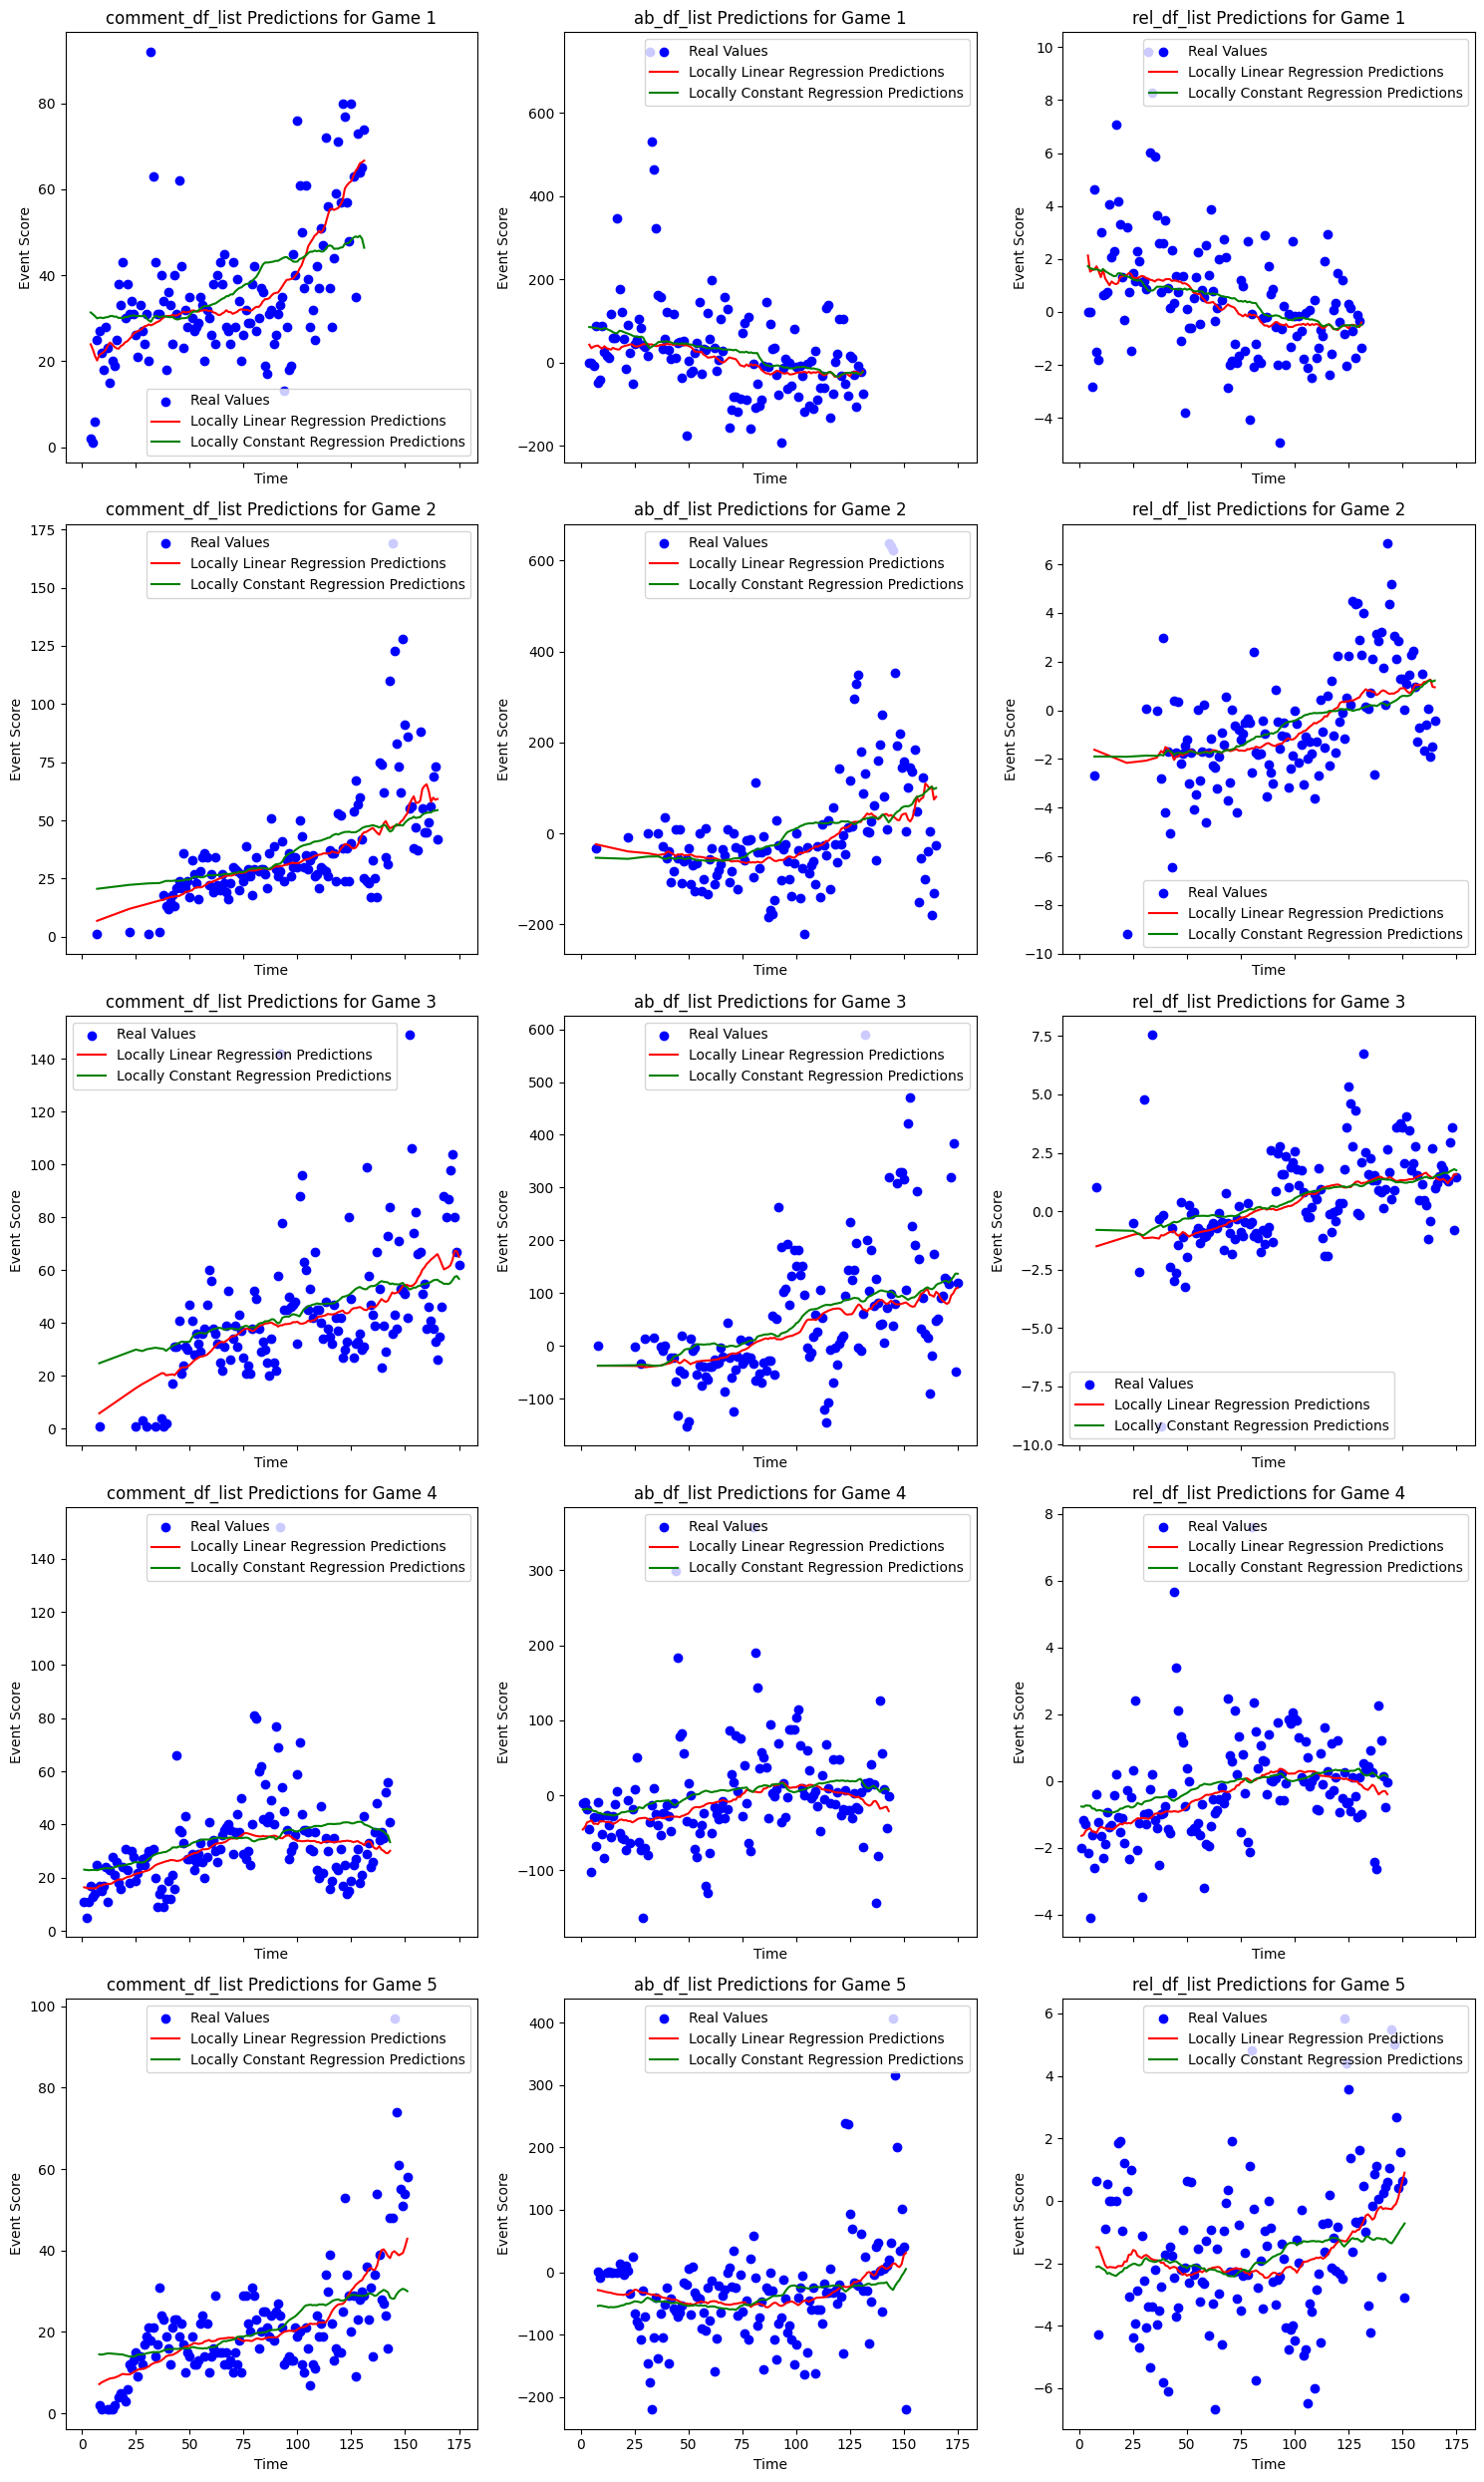

In [32]:
import os

def plot_predictions(ax, data_df_name, df, y_preds_lin, y_preds_con):

    # 예측 플롯
    ax.scatter(df['time'], df['event_score'], color='blue', label='Real Values')
    ax.plot(df['time'], y_preds_lin, color='red', label='Locally Linear Regression Predictions')
    ax.plot(df['time'], y_preds_con, color='green', label='Locally Constant Regression Predictions')
    ax.set_title(f'{data_df_name} Predictions for Game {(i+1)%5 if (i+1)%5!=0 else 5}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Event Score')
    ax.legend()



# 5행 3열 그리드 생성
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 25), sharex=True, sharey=False)

# 플롯 그리기
i = 0
for (data_df_name, df_scores), preds_lin, preds_con in zip(data_df_list.items(), preds_list_lin, preds_list_con):
    for df, y_preds_lin, y_preds_con in zip(df_scores, preds_lin, preds_con):
        # 열 우선 인덱싱으로 행과 열 결정
        col = i // 5  # 열 인덱스
        row = i % 5   # 행 인덱스

        # 축 선택
        ax = axes[row, col]

        plot_predictions(ax, data_df_name, df, y_preds_lin, y_preds_con)

        i += 1
        if i >= 15:  # 최대 15개의 플롯만 그림
            break

file_path = '/content/drive/MyDrive/22. comment_project/save_files'
file_name ='plot_fitted_model.png'
save_name =os.path.join(file_path, file_name)

plt.tight_layout()
plt.show()
plt.savefig(save_name)

#########################################################################
# 개별로 그리는 법
# import matplotlib
# import matplotlib.pyplot as plt
# %matplotlib inline



# def plot_predictions(data_df_name, df_scores, preds_variables_lin, preds_variables_con):
#     fig, axes = plt.subplots(nrows=len(df_scores), ncols=1, figsize=(10, 20), sharex=True)

#     for i, (df, y_preds_lin, y_preds_con) in enumerate(zip(df_scores, preds_variables_lin, preds_variables_con)):
#         ax = axes[i]

#         # 실제 값
#         ax.scatter(df['time'], df['event_score'], color='blue', label='Real Values')

#         # 국소 선형회귀 예측값
#         ax.plot(df['time'], y_preds_lin, color='red', label='Locally Linear Regression Predictions')

#         # 국소 상수회귀 예측값
#         ax.plot(df['time'], y_preds_con, color='green', label='Locally Constant Regression Predictions')

#         ax.set_title(f'{data_df_name} Predictions for Game {i+1}')
#         ax.set_xlabel('Time')
#         ax.set_ylabel('Event Score')
#         ax.legend()


# data_df_list = {'comment_cnt' : comment_df_list,
#                 'ab_frequency' : ab_df_list,
#                 'rel_frequency' : rel_df_list}



# for (data_df_name, df_scores), preds_variables_lin, preds_variables_con in zip(data_df_list.items(), preds_list_lin, preds_list_con):

#   plot_predictions(data_df_name, df_scores, preds_variables_lin, preds_variables_con)
# plt.tight_layout()
# plt.show()

### 이상점 정의


In [33]:
# 이상점
import numpy as np


# identify_outliers 정의  : residuals에서 outliers 추출
def identify_outliers(residuals, k): ################################## k
    # `nan`을 제외하고 사분위수 계산
    valid_residuals = residuals[~np.isnan(residuals)]
    Q1 = np.percentile(valid_residuals, 25)
    Q3 = np.percentile(valid_residuals, 75)
    IQR = Q3 - Q1

    # 임계값 설정
    threshold = Q3 + k * IQR

    # 이상점 후보 찾기
    outliers = []
    for i in range(len(residuals)):
        if residuals[i] >= threshold and not np.isnan(residuals[i]):
            # 주변 3개 데이터 포인트와 비교
            local_max = True
            for j in range(max(0, i-3), min(len(residuals), i+4)):  # i+4는 범위가 i+3까지 포함되도록
                if not np.isnan(residuals[j]) and residuals[i] < residuals[j]:
                    local_max = False
                    break
            if local_max:
                outliers.append(i)
    return outliers


# identify_outliers_k 정의 : def identify_outliers(residuals, k)를 통하여 outliers를 찾은후 ->
# 해당되는 outlier_""times""_list 리턴
def identify_outliers_k(df_scores, residuals_variables, k):
    outlier_times_list = []
    for df_score, residuals in zip(df_scores, residuals_variables):
        outlier_indices = identify_outliers(residuals, k=k) #identify_outliers #k
        outlier_times = df_score['time'].iloc[outlier_indices].to_list()
        outlier_times_list.append(outlier_times)

    print(f"Outlier times for k={k}:", outlier_times_list)
    return outlier_times_list


#### residuals(잔차) 과 outliers(이상점) 그려보기

2가지 케이스만


In [34]:


k_list = [1, 1.5, 2]

data_df_list = {'comment_cnt' : comment_df_list,
                'ab_frequency' : ab_df_list,
                'rel_frequency' : rel_df_list}



<Figure size 640x480 with 0 Axes>

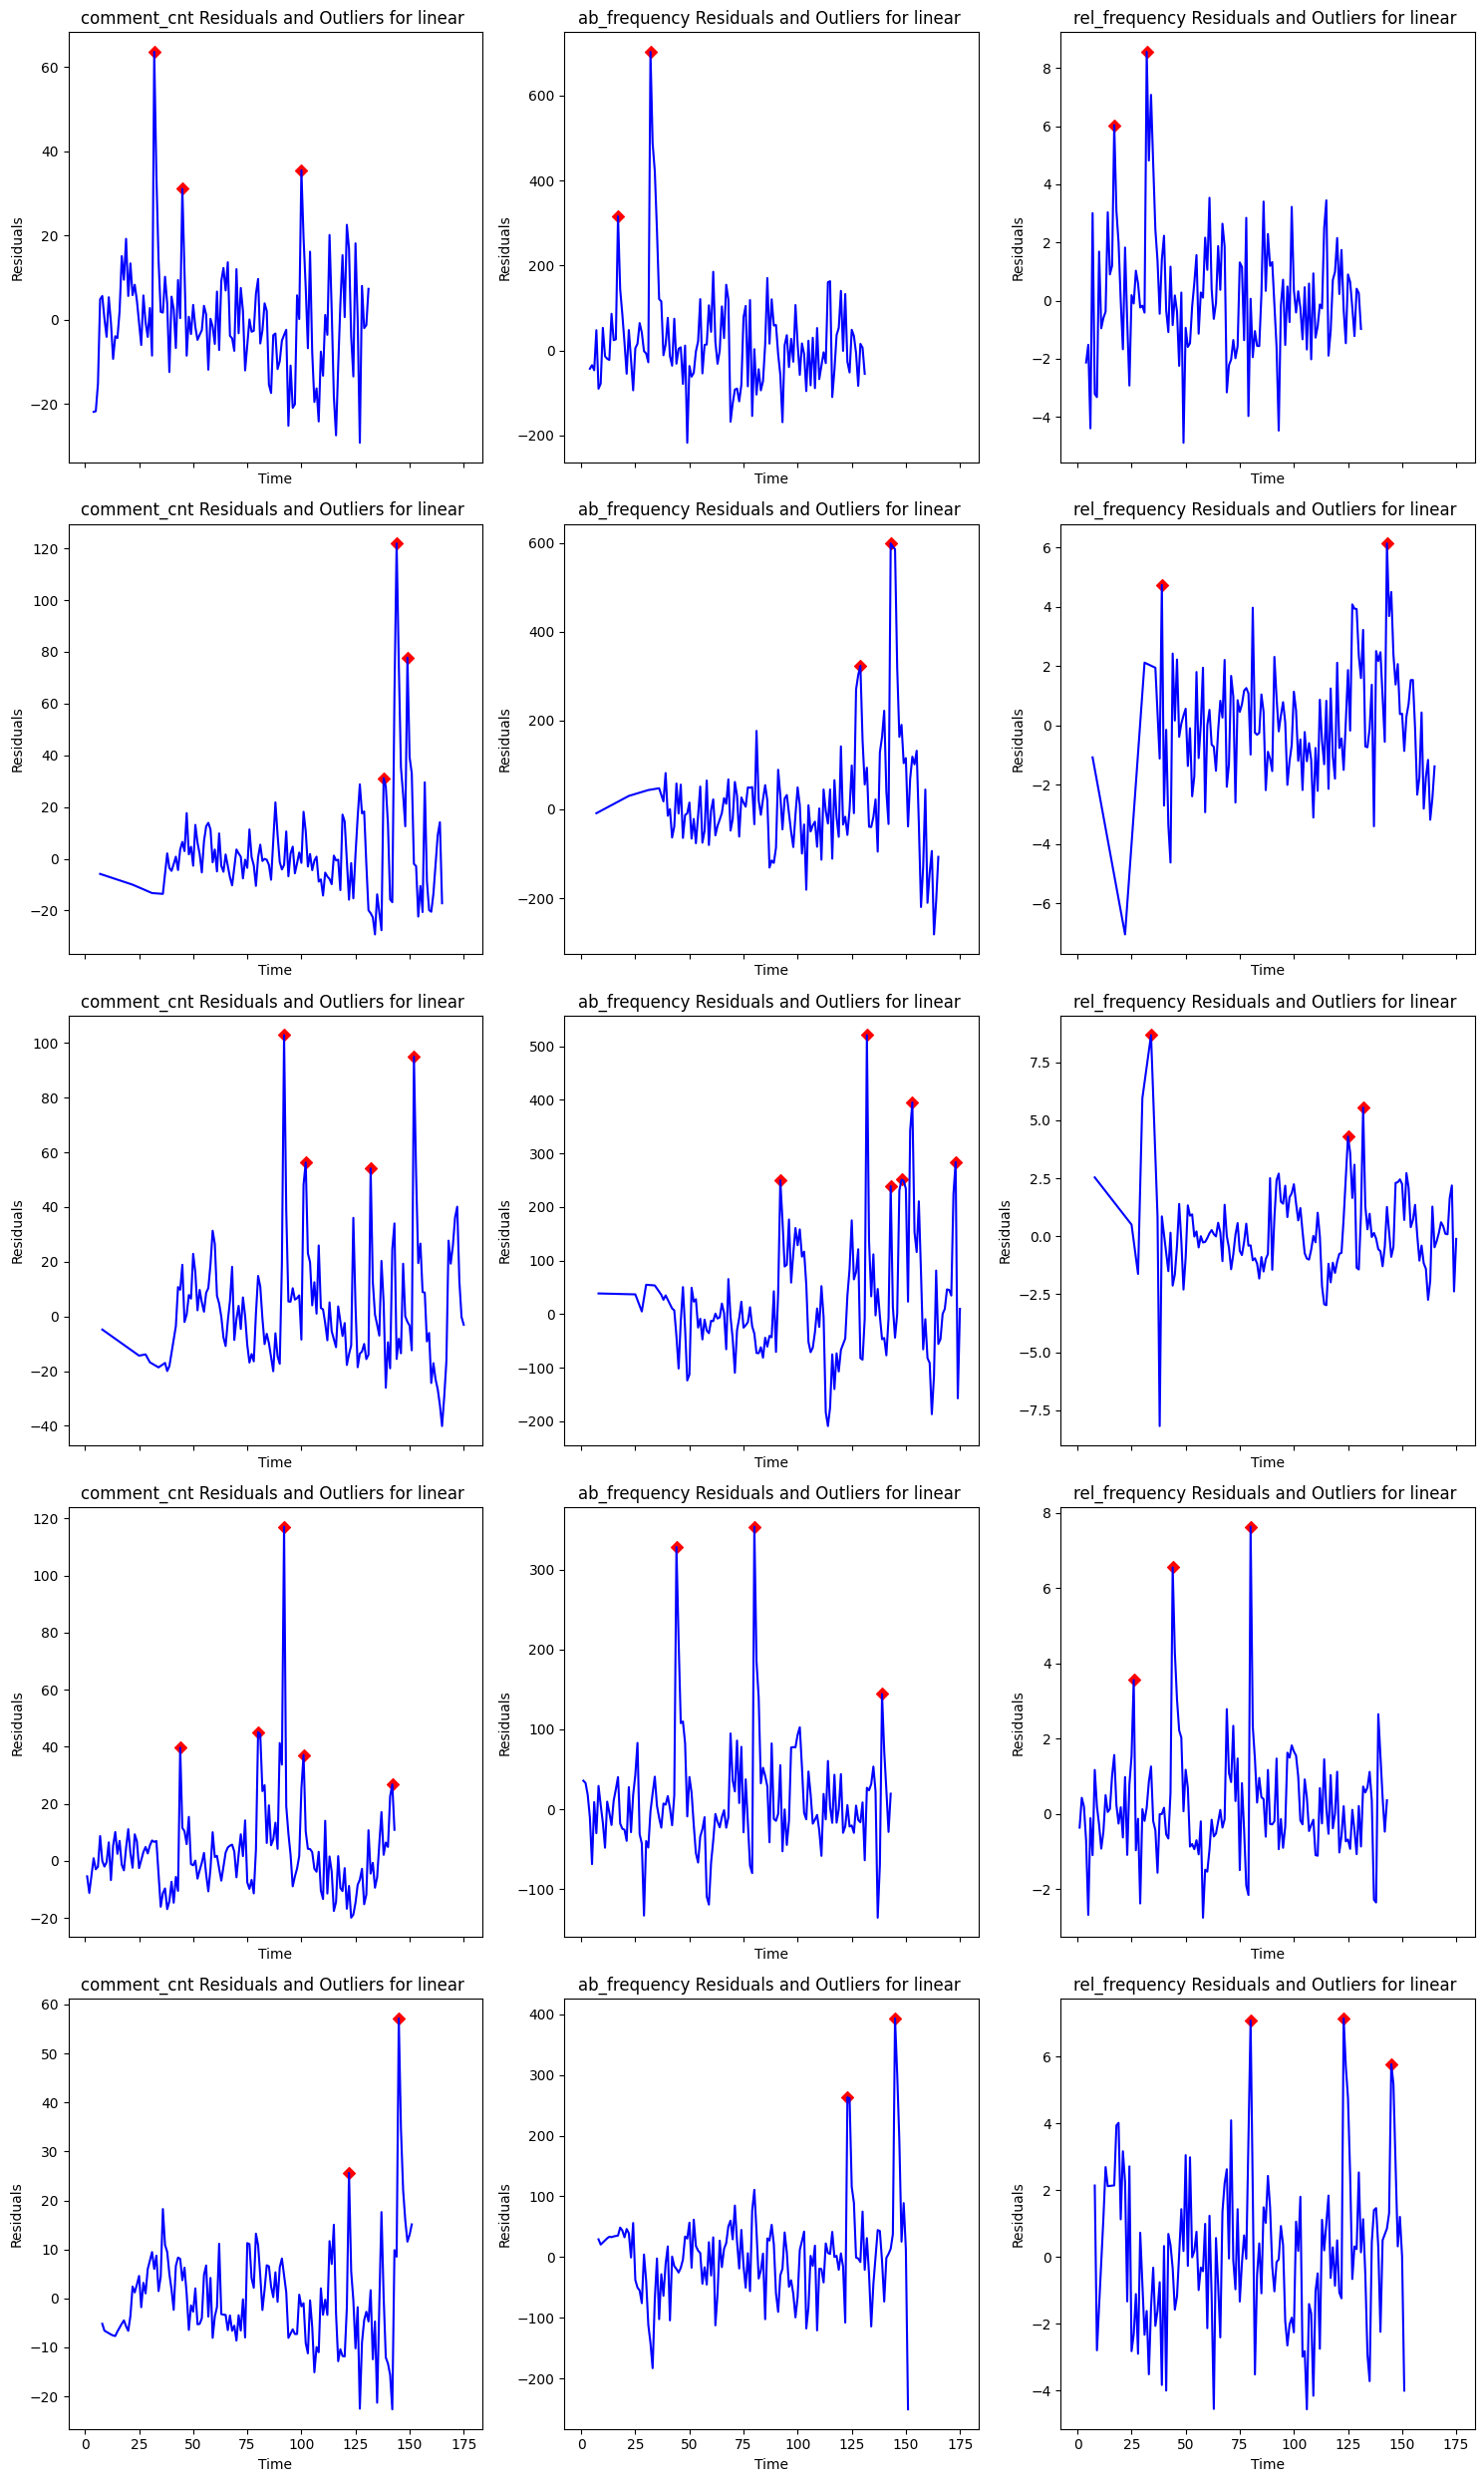

In [35]:
#k=1.5, residuals_list_lin

k =1.5


import matplotlib.pyplot as plt

def plot_residuals_and_outliers(ax, data_df_name, df, residuals_variables, k):
    # 실제 잔차 플롯
    ax.plot(df['time'], residuals_variables, label='linear Residuals', color='blue')


    # 이상점 탐지
    outlier_indices = identify_outliers(residuals_variables, k=k)
    outlier_times = df['time'].iloc[outlier_indices]
    outlier_values = residuals_variables[outlier_indices]

    # 이상점 표시
    ax.scatter(outlier_times, outlier_values, color='red', marker='D', label='Outliers')
    ax.set_title(f'{data_df_name} Residuals and Outliers for linear ')
    ax.set_xlabel('Time')
    ax.set_ylabel('Residuals')

# 5행 3열 그리드 생성
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 25), sharex=True, sharey=False)


# 플롯 그리기
i = 0
for (data_df_name, df_scores), residuals_variables in zip(data_df_list.items(), residuals_list_lin): # residuals_list_con
    for df, residuals in zip(df_scores, residuals_variables):
        # 열 우선 인덱싱으로 행과 열 결정
        col = i // 5  # 열 인덱스
        row = i % 5   # 행 인덱스

        # 축 선택
        ax = axes[row, col]


        plot_residuals_and_outliers(ax, data_df_name, df, residuals, k)

        i += 1
        if i >= 15:  # 최대 15개의 플롯만 그림
            break


plt.tight_layout()
plt.show()


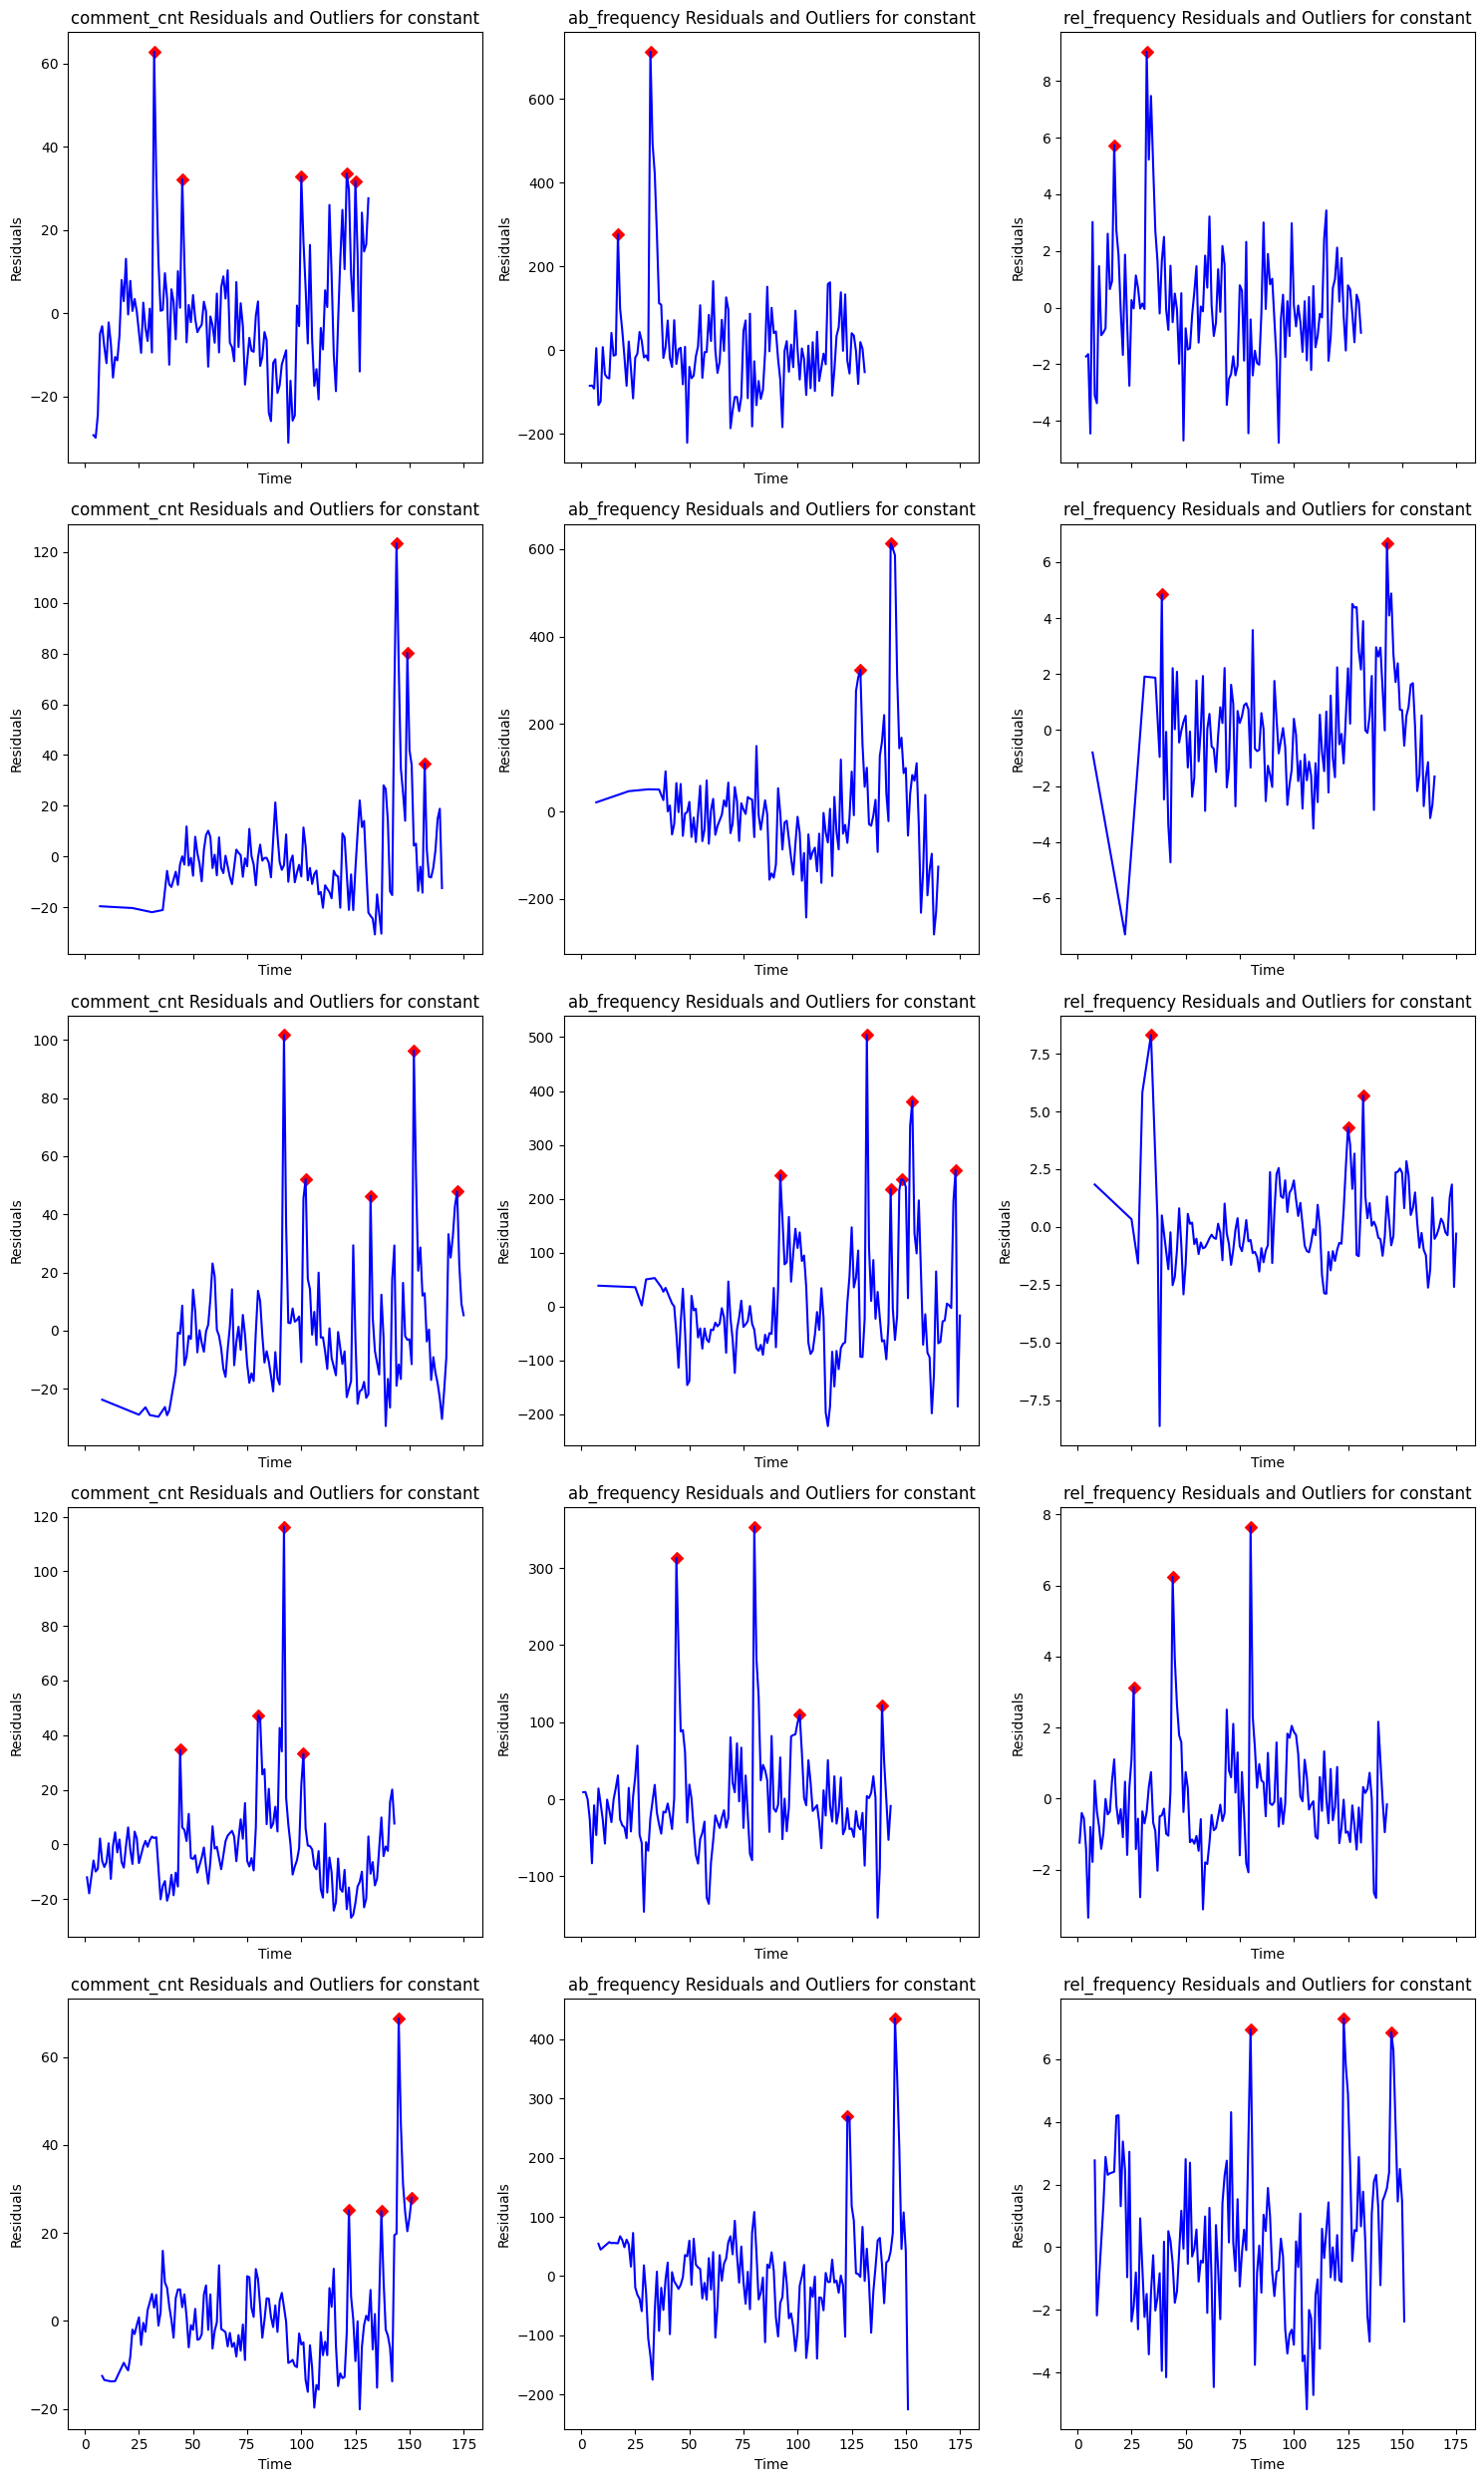

In [36]:
#k=1.5, residuals_list_con

k =1.5


import matplotlib.pyplot as plt

def plot_residuals_and_outliers(ax, data_df_name, df, residuals_variables, k):
    # 실제 잔차 플롯
    ax.plot(df['time'], residuals_variables, label='linear Residuals', color='blue')


    # 이상점 탐지
    outlier_indices = identify_outliers(residuals_variables, k=k)
    outlier_times = df['time'].iloc[outlier_indices]
    outlier_values = residuals_variables[outlier_indices]

    # 이상점 표시
    ax.scatter(outlier_times, outlier_values, color='red', marker='D', label='Outliers')
    ax.set_title(f'{data_df_name} Residuals and Outliers for constant')
    ax.set_xlabel('Time')
    ax.set_ylabel('Residuals')

# 5행 3열 그리드 생성
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 25), sharex=True, sharey=False)


# 플롯 그리기
i = 0
for (data_df_name, df_scores), residuals_variables in zip(data_df_list.items(), residuals_list_con): # residuals_list_con
    for df, residuals in zip(df_scores, residuals_variables):
        # 열 우선 인덱싱으로 행과 열 결정
        col = i // 5  # 열 인덱스
        row = i % 5   # 행 인덱스

        # 축 선택
        ax = axes[row, col]


        plot_residuals_and_outliers(ax, data_df_name, df, residuals, k)

        i += 1
        if i >= 15:  # 최대 15개의 플롯만 그림
            break


plt.tight_layout()
plt.show()


In [37]:
# import matplotlib.pyplot as plt

# def plot_residuals_and_outliers(df_scores, residuals_variables, k=1.5):
#     fig, axes = plt.subplots(nrows=len(df_scores), ncols=1, figsize=(10, 20), sharex=True)

#     for i, (df, residuals) in enumerate(zip(df_scores, residuals_variables)):
#         ax = axes[i]

#         # 실제 잔차 플롯
#         ax.plot(df['time'], residuals, label='Residuals', color='blue')

#         # 이상점 탐지
#         outlier_indices = identify_outliers(residuals, k=k)
#         outlier_times = df['time'].iloc[outlier_indices]
#         outlier_values = residuals[outlier_indices]

#         # 이상점 표시
#         ax.scatter(outlier_times, outlier_values, color='red', marker='D', label='Outliers')

#         ax.set_title(f'Deleted Residuals and Outliers for Locally Constant Regression {i+1}')
#         ax.set_xlabel('Time')
#         ax.set_ylabel('Residuals')
#         ax.legend()

#     plt.tight_layout()
#     plt.show()

# plot_residuals_and_outliers(df_scores, residuals_variables_con)

### 평가 함수 정의(3가지)
####  validate_data_origin(predicted_values) 평가함수 + - 0 interval

#### validate_data_1(predicted_values) 평가함수 + - 1 interval

#### validate_data_2(predicted_values) 평가함수 + - 2 interval

In [38]:
#평가함수_기본

# 예측값 리스트 넣으면 (5경기) 총 평가 지표 반환
def validate_data_origin(predicted_values):

  # 실제 값과 예측 값 리스트
  true_values = [[32], [127, 143], [101, 124, 142, 152, 155, 168], [43, 80, 97, 100], [123, 145]]

  # 각 경기 시간
  total_time_points = [len(df_score_1['time']), len(df_score_2['time']), len(df_score_3['time']), len(df_score_4['time']), len(df_score_5['time'])]

  # 평가 지표를 저장할 리스트
  metrics = []

  # 각 평가 지표의 총합을 저장할 변수 초기화
  total_TP = total_FP = total_FN = total_TN = 0

  for true, predicted, total_time in zip(true_values, predicted_values, total_time_points):
      true_set = set(true)
      predicted_set = set(predicted)

      TP = len(true_set & predicted_set)
      FP = len(predicted_set - true_set)
      FN = len(true_set - predicted_set)
      TN = total_time - (TP + FP + FN)  # Corrected to subtract the union of true and predicted from total time

      total_TP += TP
      total_FP += FP
      total_FN += FN
      total_TN += TN


  # 총 평가 지표 계산
  total_Accuracy = (total_TP + total_TN) / (total_TP + total_TN + total_FP + total_FN)
  total_Sensitivity = total_TP / (total_TP + total_FN) if (total_TP + total_FN) > 0 else 0
  total_Specificity = total_TN / (total_TN + total_FP) if (total_TN + total_FP) > 0 else 0
  total_Precision = total_TP / (total_TP + total_FP) if (total_TP + total_FP) > 0 else 0
  total_F1_Score = 2 * (total_Precision * total_Sensitivity) / (total_Precision + total_Sensitivity) if (total_Precision + total_Sensitivity) > 0 else 0

  # 결과 출력
  print("Total Metrics:")
  print(f"Total Accuracy: {total_Accuracy:.4f}")
  print(f"Total Sensitivity (Recall): {total_Sensitivity:.4f}")
  print(f"Total Specificity: {total_Specificity:.4f}")
  print(f"Total Precision: {total_Precision:.4f}")
  print(f"Total F1 Score: {total_F1_Score:.4f}")

  return total_Accuracy, total_Sensitivity, total_Specificity, total_Precision, total_F1_Score


# 평가함수 + - 1 interval
def validate_data_1(predicted_values):
    # 실제 값과 예측 값 리스트
    true_values = [[32], [127, 143], [101, 124, 142, 152, 155, 168], [43, 80, 97, 100], [123, 145]]

    # 각 경기 시간
    total_time_points = [len(df_score_1['time']), len(df_score_2['time']), len(df_score_3['time']), len(df_score_4['time']), len(df_score_5['time'])]

    # 각 평가 지표의 총합을 저장할 변수 초기화
    total_TP = total_FP = total_FN = total_TN = 0


    for true, predicted, total_time in zip(true_values, predicted_values, total_time_points):
        true_set = set(true)
        predicted_set = set(predicted)

        # TP 계산: refined_TP 집합을 직접 계산
        refined_true = {v for v in true for p in predicted if p in range(v - 1, v + 2)}

        refined_pre = {p for p in predicted for v in true if p in range(v - 1, v + 2)}


        # FP, FN, TN 계산
        TP = len(refined_true)
        FP = len(predicted_set - refined_pre)
        FN = len(true_set - refined_true)
        TN = total_time - (TP + FP + FN)

        total_TP += TP
        total_FP += FP
        total_FN += FN
        total_TN += TN

    # 총 평가 지표 계산
    total_Accuracy = (total_TP + total_TN) / (total_TP + total_TN + total_FP + total_FN)
    total_Sensitivity = total_TP / (total_TP + total_FN) if (total_TP + total_FN) > 0 else 0
    total_Specificity = total_TN / (total_TN + total_FP) if (total_TN + total_FP) > 0 else 0
    total_Precision = total_TP / (total_TP + total_FP) if (total_TP + total_FP) > 0 else 0
    total_F1_Score = 2 * (total_Precision * total_Sensitivity) / (total_Precision + total_Sensitivity) if (total_Precision + total_Sensitivity) > 0 else 0

    # 결과 출력
    print("Total Metrics:")
    print(f"Total Accuracy: {total_Accuracy:.4f}")
    print(f"Total Sensitivity (Recall): {total_Sensitivity:.4f}")
    print(f"Total Specificity: {total_Specificity:.4f}")
    print(f"Total Precision: {total_Precision:.4f}")
    print(f"Total F1 Score: {total_F1_Score:.4f}")

    return total_Accuracy, total_Sensitivity, total_Specificity, total_Precision, total_F1_Score


# 평가함수 + - 2 interval
def validate_data_2(predicted_values):
    # 실제 값과 예측 값 리스트
    true_values = [[32], [127, 143], [101, 124, 142, 152, 155, 168], [43, 80, 97, 100], [123, 145]]

    # 각 경기 시간
    total_time_points = [len(df_score_1['time']), len(df_score_2['time']), len(df_score_3['time']), len(df_score_4['time']), len(df_score_5['time'])]

    # 각 평가 지표의 총합을 저장할 변수 초기화
    total_TP = total_FP = total_FN = total_TN = 0


    for true, predicted, total_time in zip(true_values, predicted_values, total_time_points):
        true_set = set(true)
        predicted_set = set(predicted)


        # TP 계산: refined_TP 집합을 직접 계산
        refined_true = {v for v in true for p in predicted if p in range(v - 2, v + 3)}

        refined_pre = {p for p in predicted for v in true if p in range(v - 2, v + 3)}


        # FP, FN, TN 계산
        TP = len(refined_true)
        FP = len(predicted_set - refined_pre)
        FN = len(true_set - refined_true)
        TN = total_time - (TP + FP + FN)

        total_TP += TP
        total_FP += FP
        total_FN += FN
        total_TN += TN

    # 총 평가 지표 계산
    total_Accuracy = (total_TP + total_TN) / (total_TP + total_TN + total_FP + total_FN)
    total_Sensitivity = total_TP / (total_TP + total_FN) if (total_TP + total_FN) > 0 else 0
    total_Specificity = total_TN / (total_TN + total_FP) if (total_TN + total_FP) > 0 else 0
    total_Precision = total_TP / (total_TP + total_FP) if (total_TP + total_FP) > 0 else 0
    total_F1_Score = 2 * (total_Precision * total_Sensitivity) / (total_Precision + total_Sensitivity) if (total_Precision + total_Sensitivity) > 0 else 0

    # 결과 출력
    print("Total Metrics:")
    print(f"Total Accuracy: {total_Accuracy:.4f}")
    print(f"Total Sensitivity (Recall): {total_Sensitivity:.4f}")
    print(f"Total Specificity: {total_Specificity:.4f}")
    print(f"Total Precision: {total_Precision:.4f}")
    print(f"Total F1 Score: {total_F1_Score:.4f}")

    return total_Accuracy, total_Sensitivity, total_Specificity, total_Precision, total_F1_Score




### main 함수 정의, 실행 : main_lin(validate_data), main_con(validate_data)

In [39]:
#main함수

# 커널 선형회귀의 평가지표, 예측값 리스트(5개), 잔차 리스트(5개) 반환 함수
def main_lin(df_name, df_scores, validate_data, k):
  # df_scores 에 들어갈 수 있는 종류(3가지) : comment_df_list, ab_df_list, rel_df_list
  # validate_data 에 들어갈 수 있는 종류(3가지) :  validate_data_origin/validate_data_1/validate_data_2
                                                                        #(#평가함수_기본)/(# 평가함수 + - 1 interval)(# 평가함수 + - 2 interval)
  _, residuals_variables_lin = pred_resi_lin(df_scores)


  outlier_results = identify_outliers_k(df_scores, residuals_variables_lin, k)


  print(f'k가 {k}일때', '선형', '-------------')
  type= '선형'
  #validate_data 여기서 쓰임
  total_Accuracy, total_Sensitivity, total_Specificity, total_Precision, total_F1_Score = validate_data(outlier_results)
  result_lin_dict ={
                    'validate_data' : validate_data,
                    'name' : df_name,
                    'k' : k,
                    'type' : type,
                    'Total Accuracy' : round(total_Accuracy,3) ,
                    'Total Sensitivity' :round(total_Sensitivity,3) ,
                    'Total Specificity' :round(total_Specificity,3) ,
                    'Total Precision' :round(total_Precision,3) ,
                    'Total F1 Score' :round(total_F1_Score,3)
                    }

  return result_lin_dict

# 커널 상수회귀의 평가지표, 예측값 리스트(5개), 잔차 리스트(5개) 반환 함수
def main_con(df_name, df_scores, validate_data,k):
  _, residuals_variables_con = pred_resi_con(df_scores)


  outlier_results = identify_outliers_k(df_scores, residuals_variables_con, k)



  print(f'k가 {i}일때', '상수', '-------------')
  type= '상수'
  #validate_data 여기서 쓰임
  total_Accuracy, total_Sensitivity, total_Specificity, total_Precision, total_F1_Score = validate_data(outlier_results)
  result_con_dict ={
                    'validate_data' : validate_data,
                    'name' : df_name,
                    'k' : k,
                    'type' : type,
                    'Total Accuracy' : round(total_Accuracy,3) ,
                    'Total Sensitivity' :round(total_Sensitivity,3) ,
                    'Total Specificity' :round(total_Specificity,3) ,
                    'Total Precision' :round(total_Precision,3) ,
                    'Total F1 Score' :round(total_F1_Score,3)

                    }

  return result_con_dict




## 평가함수 실행

In [40]:
import datetime
import os


file_path = '/content/drive/MyDrive/22. comment_project/save_files'
# 1. origin

# #main 함수 실행
# comment_cnt_list = [grouped_df_1, grouped_df_2, grouped_df_3, grouped_df_4, grouped_df_5]
# ab_scores_list = [df_score_1, df_score_2, df_score_3, df_score_4, df_score_5]
# rel_scores_list = [relative_df_score_1, relative_df_score_2, relative_df_score_3, relative_df_score_4, relative_df_score_5]


# 데이터 리스트와 이름을 딕셔너리로 저장 #아래 for 문에서 쓰려고
validate_data_list = {'validate_data_origin' : validate_data_origin,
                      'validate_data_1' : validate_data_1,
                      'validate_data_2' : validate_data_2}

data_df_list = {'comment_df_list' : comment_df_list,
                'ab_df_list' : ab_df_list,
                'rel_df_list' : rel_df_list}

k_list = [1, 1.5, 2]


# 데이터 구조 이름 리스트
validate_data_names = ['0interval', '1interval', '2interval']
# df_scores_names = ['comment', 'ab', 'rel']


#current_time 지정
import datetime
import pytz

def get_kst_current_time():
    # 현재 UTC 시간을 가져옴
    utc_now = datetime.datetime.utcnow()

    # UTC 시간을 한국 시간대로 변환
    kst = pytz.timezone('Asia/Seoul')
    kst_now = utc_now.replace(tzinfo=pytz.utc).astimezone(kst)

    # 한국 시간대에 맞춰 현재 시간을 문자열로 포맷
    return kst_now.strftime("%Y%m%d_%H%M%S")

# 현재 시간을 한국 시간대로 설정하고 파일명 생성
current_time = get_kst_current_time()


# 커널 선형 회귀

# 결과를 저장할 딕셔너리
results_dict_lin = {}



for validate_name, validate_data in validate_data_list.items():
  print(validate_name, '----------------------')
  print('frac = ', frac)
  results = []
  for df_name, df_scores in data_df_list.items():
    print(df_name, '----------------------')
    for k in k_list:
      print('k = ',k, '----------------------')
      result_lin_dict = main_lin(df_name, df_scores, validate_data, k)
      results.append(result_lin_dict)

  results_df = pd.DataFrame(results)
  file_name = f"results_lin_{frac}_{validate_name}_{current_time}.xlsx"
  excel_filename = os.path.join(file_path, file_name)
  results_df.T.to_excel(excel_filename, index=True)


# 커널 상수 회귀

# 결과를 저장할 딕셔너리
results_dict_con = {}


for validate_name, validate_data in validate_data_list.items():
  print(validate_name, '----------------------')
  print('bandwidth = ', bandwidth)
  results = []
  for df_name, df_scores in data_df_list.items():
    print(df_name, '----------------------')
    for k in k_list:
      print('k = ',k, '----------------------')
      result_con_dict = main_con(df_name, df_scores, validate_data, k)
      results.append(result_con_dict)

  results_df = pd.DataFrame(results)
  file_name = f"results_con_{bandwidth}_{validate_name}_{current_time}.xlsx"
  excel_filename = os.path.join(file_path, file_name)
  results_df.T.to_excel(excel_filename, index=True)

# frac=0.5
# bandwidth=50

# #선형
# result_list_con_all =[]
# for name, df_scores in df_scores_dict.items(): #df_scores를 comment_cnt_list, ab_scores_list, rel_scores_list
#   df_scores = df_scores
#   print(f'df_cscore이 {name} 일때---------------------------------------')
#   result_list_lin_0, preds_variables_lin, residuals_variables_lin = main_lin(validate_data_origin)
#   result_list_lin_all.append(result_list_lin_0)

# #상수
# result_list_con_all =[]
# for name, df_scores in df_scores_dict.items():
#   df_scores = df_scores
#   print(f'df_cscore이 {name} 일때---------------------------------------')
#   result_list_con_0, preds_variables_con, residuals_variables_con = main_con(validate_data_origin)
#   result_list_con_all.append(result_list_con_0)


validate_data_origin ----------------------
frac =  0.5743
comment_df_list ----------------------
k =  1 ----------------------
Outlier times for k=1: [[32, 45, 100, 113, 121, 125], [88, 127, 138, 144, 149, 157], [92, 102, 124, 132, 143, 152, 168], [44, 80, 92, 101, 137], [36, 122, 137, 145]]
k가 1일때 선형 -------------
Total Metrics:
Total Accuracy: 0.9592
Total Sensitivity (Recall): 0.4667
Total Specificity: 0.9698
Total Precision: 0.2500
Total F1 Score: 0.3256
k =  1.5 ----------------------
Outlier times for k=1.5: [[32, 45, 100], [127, 138, 144, 149, 157], [92, 102, 132, 152], [44, 80, 92, 101], [122, 145]]
k가 1.5일때 선형 -------------
Total Metrics:
Total Accuracy: 0.9677
Total Sensitivity (Recall): 0.3333
Total Specificity: 0.9813
Total Precision: 0.2778
Total F1 Score: 0.3030
k =  2 ----------------------
Outlier times for k=2: [[32, 45, 100], [144, 149], [92, 102, 132, 152], [44, 80, 92, 101], [145]]
k가 2일때 선형 -------------
Total Metrics:
Total Accuracy: 0.9705
Total Sensitivity (Rec

In [41]:
import os
import glob
import pandas as pd

# excel_filename = f"results_lin_{frac}_{validate_name}_{current_time}.xlsx"
# file_path = '/content/drive/MyDrive/22. comment_project/save_files'
pattern = f"/content/drive/MyDrive/22. comment_project/save_files/results_lin*.xlsx"


# 주어진 패턴과 일치하는 모든 파일 리스트를 가져옴
files = glob.glob(pattern)

# 파일이 없을 경우 처리
if not files:
    print("No files found.")
else:
    # 파일을 수정 시간에 따라 정렬
    files.sort(key=lambda x: os.path.getmtime(x), reverse=True)
    print(files)

files

['/content/drive/MyDrive/22. comment_project/save_files/results_lin_0.5743_validate_data_2_20240507_053410.xlsx', '/content/drive/MyDrive/22. comment_project/save_files/results_lin_0.5743_validate_data_1_20240507_053410.xlsx', '/content/drive/MyDrive/22. comment_project/save_files/results_lin_0.5743_validate_data_origin_20240507_053410.xlsx', '/content/drive/MyDrive/22. comment_project/save_files/results_lin_0.5743_validate_data_2_20240507_051325.xlsx', '/content/drive/MyDrive/22. comment_project/save_files/results_lin_0.5743_validate_data_1_20240507_051325.xlsx', '/content/drive/MyDrive/22. comment_project/save_files/results_lin_0.5743_validate_data_origin_20240507_051325.xlsx']


['/content/drive/MyDrive/22. comment_project/save_files/results_lin_0.5743_validate_data_2_20240507_053410.xlsx',
 '/content/drive/MyDrive/22. comment_project/save_files/results_lin_0.5743_validate_data_1_20240507_053410.xlsx',
 '/content/drive/MyDrive/22. comment_project/save_files/results_lin_0.5743_validate_data_origin_20240507_053410.xlsx',
 '/content/drive/MyDrive/22. comment_project/save_files/results_lin_0.5743_validate_data_2_20240507_051325.xlsx',
 '/content/drive/MyDrive/22. comment_project/save_files/results_lin_0.5743_validate_data_1_20240507_051325.xlsx',
 '/content/drive/MyDrive/22. comment_project/save_files/results_lin_0.5743_validate_data_origin_20240507_051325.xlsx']

In [42]:
df = pd.read_excel(files[0])
df


,Unnamed: 0,0,1,2,3,4,5,6,7,8
0,validate_data,<function validate_data_2 at 0x7f955a7ffbe0>,<function validate_data_2 at 0x7f955a7ffbe0>,<function validate_data_2 at 0x7f955a7ffbe0>,<function validate_data_2 at 0x7f955a7ffbe0>,<function validate_data_2 at 0x7f955a7ffbe0>,<function validate_data_2 at 0x7f955a7ffbe0>,<function validate_data_2 at 0x7f955a7ffbe0>,<function validate_data_2 at 0x7f955a7ffbe0>,<function validate_data_2 at 0x7f955a7ffbe0>
1,name,comment_df_list,comment_df_list,comment_df_list,ab_df_list,ab_df_list,ab_df_list,rel_df_list,rel_df_list,rel_df_list
2,k,1,1.5,2,1,1.5,2,1,1.5,2
3,type,선형,선형,선형,선형,선형,선형,선형,선형,선형
4,Total Accuracy,0.976,0.982,0.982,0.98,0.987,0.986,0.975,0.98,0.982
5,Total Sensitivity,0.867,0.667,0.533,0.8,0.667,0.6,0.533,0.467,0.333
6,Total Specificity,0.978,0.989,0.991,0.984,0.994,0.994,0.984,0.991,0.996
7,Total Precision,0.464,0.556,0.571,0.522,0.714,0.692,0.421,0.538,0.625
8,Total F1 Score,0.605,0.606,0.552,0.632,0.69,0.643,0.471,0.5,0.435


In [43]:
import os
import glob
import pandas as pd

# excel_filename = f"results_lin_{frac}_{validate_name}_{current_time}.xlsx"
pattern = f"/content/drive/MyDrive/22. comment_project/save_files/results_con*.xlsx"


# 주어진 패턴과 일치하는 모든 파일 리스트를 가져옴
files = glob.glob(pattern)

# 파일이 없을 경우 처리
if not files:
    print("No files found.")
else:
    # 파일을 수정 시간에 따라 정렬
    files.sort(key=lambda x: os.path.getmtime(x), reverse=True)
    print(files)

files

['/content/drive/MyDrive/22. comment_project/save_files/results_con_50_validate_data_2_20240507_053410.xlsx', '/content/drive/MyDrive/22. comment_project/save_files/results_con_50_validate_data_1_20240507_053410.xlsx', '/content/drive/MyDrive/22. comment_project/save_files/results_con_50_validate_data_origin_20240507_053410.xlsx', '/content/drive/MyDrive/22. comment_project/save_files/results_con_50_validate_data_2_20240507_051325.xlsx', '/content/drive/MyDrive/22. comment_project/save_files/results_con_50_validate_data_origin_20240507_051325.xlsx', '/content/drive/MyDrive/22. comment_project/save_files/results_con_50_validate_data_1_20240507_051325.xlsx', '/content/drive/MyDrive/22. comment_project/save_files/results_con_50_validate_data_2_20240507_045913.xlsx', '/content/drive/MyDrive/22. comment_project/save_files/results_con_50_validate_data_1_20240507_045913.xlsx', '/content/drive/MyDrive/22. comment_project/save_files/results_con_50_validate_data_origin_20240507_045913.xlsx']


['/content/drive/MyDrive/22. comment_project/save_files/results_con_50_validate_data_2_20240507_053410.xlsx',
 '/content/drive/MyDrive/22. comment_project/save_files/results_con_50_validate_data_1_20240507_053410.xlsx',
 '/content/drive/MyDrive/22. comment_project/save_files/results_con_50_validate_data_origin_20240507_053410.xlsx',
 '/content/drive/MyDrive/22. comment_project/save_files/results_con_50_validate_data_2_20240507_051325.xlsx',
 '/content/drive/MyDrive/22. comment_project/save_files/results_con_50_validate_data_origin_20240507_051325.xlsx',
 '/content/drive/MyDrive/22. comment_project/save_files/results_con_50_validate_data_1_20240507_051325.xlsx',
 '/content/drive/MyDrive/22. comment_project/save_files/results_con_50_validate_data_2_20240507_045913.xlsx',
 '/content/drive/MyDrive/22. comment_project/save_files/results_con_50_validate_data_1_20240507_045913.xlsx',
 '/content/drive/MyDrive/22. comment_project/save_files/results_con_50_validate_data_origin_20240507_045913.xl

In [44]:
df = pd.read_excel(files[0])
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8
0,validate_data,<function validate_data_2 at 0x7f955a7ffbe0>,<function validate_data_2 at 0x7f955a7ffbe0>,<function validate_data_2 at 0x7f955a7ffbe0>,<function validate_data_2 at 0x7f955a7ffbe0>,<function validate_data_2 at 0x7f955a7ffbe0>,<function validate_data_2 at 0x7f955a7ffbe0>,<function validate_data_2 at 0x7f955a7ffbe0>,<function validate_data_2 at 0x7f955a7ffbe0>,<function validate_data_2 at 0x7f955a7ffbe0>
1,name,comment_df_list,comment_df_list,comment_df_list,ab_df_list,ab_df_list,ab_df_list,rel_df_list,rel_df_list,rel_df_list
2,k,1,1.5,2,1,1.5,2,1,1.5,2
3,type,상수,상수,상수,상수,상수,상수,상수,상수,상수
4,Total Accuracy,0.977,0.975,0.979,0.982,0.99,0.989,0.98,0.982,0.982
5,Total Sensitivity,0.867,0.6,0.6,0.733,0.733,0.6,0.6,0.467,0.267
6,Total Specificity,0.98,0.983,0.987,0.987,0.996,0.997,0.989,0.993,0.997
7,Total Precision,0.481,0.429,0.5,0.55,0.786,0.818,0.529,0.583,0.667
8,Total F1 Score,0.619,0.5,0.545,0.629,0.759,0.692,0.562,0.519,0.381


## 최적의 파라미터 frac, bandwidth

score 정의

In [52]:
# # frac -- linear

# import pandas as pd
# import random


# # 매개변수 범위 설정 (frac만)
# frac_range = (0.1, 0.9)
# fixed_bandwidth = 50  # bandwidth를 고정값으로 사용

# # 결과를 저장할 리스트 초기화
# f1_score_results_list = []

# # 랜덤 서치 반복 횟수
# n_iterations = 100

# for _ in range(n_iterations):
#     frac = random.uniform(*frac_range)  # frac 랜덤 선택

#     for validate_name, validate_data in validate_data_list.items():
#         print(f"Validating: {validate_name} ----------------------")
#         for df_name, df_scores in data_df_list.items():
#             print(f"Processing DataFrame: {df_name} ----------------------")
#             for k in k_list:
#                 print(f'Using k = {k} ----------------------')
#                 # main_lin 함수에 고정된 bandwidth와 랜덤하게 선택된 frac 전달
#                 result_lin_dict = main_lin(df_scores, validate_data, k, frac=frac, bandwidth=fixed_bandwidth)
#                 f1_score = result_lin_dict['Total F1 Score']

#                 # 결과 저장
#                 f1_score_results_list.append({
#                     'frac': frac,
#                     'bandwidth': fixed_bandwidth,  # 고정된 bandwidth 기록
#                     'F1 Score': f1_score
#                 })

# # 결과를 DataFrame으로 변환
# f1_results_df = pd.DataFrame(f1_score_results_list)

# # F1 Score에 따라 내림차순 정렬
# sorted_f1_results_df = f1_results_df.sort_values(by='F1 Score', ascending=False)

# # 상위 결과 출력
# print(sorted_f1_results_df.head())



In [53]:
# # bandwidth -- constant


# import pandas as pd
# import random

# # 매개변수 범위 설정 (bandwidth만)
# bandwidth_range = (1, 100)
# fixed_frac = 0.5  # frac을 고정값으로 사용

# # 결과를 저장할 리스트 초기화
# f1_score_results_list = []

# # 랜덤 서치 반복 횟수
# n_iterations = 100

# for _ in range(n_iterations):
#     bandwidth = random.uniform(*bandwidth_range)  # bandwidth 랜덤 선택

#     for validate_name, validate_data in validate_data_list.items():
#         print(f"Validating: {validate_name} ----------------------")
#         for df_name, df_scores in data_df_list.items():
#             print(f"Processing DataFrame: {df_name} ----------------------")
#             for k in k_list:
#                 print(f'Using k = {k} ----------------------')
#                 # main_con 함수에 고정된 frac과 랜덤하게 선택된 bandwidth 전달
#                 result_lin_dict = main_con(df_name, df_scores, validate_data, k, frac=fixed_frac, bandwidth=bandwidth)
#                 f1_score = result_lin_dict['Total F1 Score']

#                 # 결과 저장
#                 f1_score_results_list.append({
#                     'frac': fixed_frac,  # 고정된 frac 기록
#                     'bandwidth': bandwidth,
#                     'F1 Score': f1_score
#                 })

# # 결과를 DataFrame으로 변환
# f1_results_df = pd.DataFrame(f1_score_results_list)

# # F1 Score에 따라 내림차순 정렬
# sorted_f1_results_df = f1_results_df.sort_values(by='F1 Score', ascending=False)

# # 상위 결과 출력
# print(sorted_f1_results_df.head())

In [54]:
# #frac - linear

# from skopt import gp_minimize
# from skopt.space import Real
# from skopt.utils import use_named_args

# # 매개변수 범위 설정 (frac만 포함)
# space  = [
#     Real(0.1, 0.9, name='frac')
# ]

# # 목적 함수 정의
# @use_named_args(space)
# def objective(**params):
#     frac = params['frac']
#     # bandwidth 값을 고정하고 싶다면, 여기에 고정값 설정
#     bandwidth = 50  # 예시 고정값
#     f1_scores = []

#     for validate_name, validate_data in validate_data_list.items():
#         for df_name, df_scores in data_df_list.items():
#             for k in k_list:
#                 # main_lin 함수 호출 시 frac은 변화시키고, bandwidth는 고정값 사용
#                 result_lin_dict = main_lin(df_name, df_scores, validate_data, k)
#                 f1_score = result_lin_dict['Total F1 Score']
#                 f1_scores.append(f1_score)

#     # 평균 F1 Score를 최소화(혹은 최대화)하도록 반환
#     return -np.mean(f1_scores)  # 최대화를 위해 부호를 반전

# # 베이지안 최적화 실행
# res = gp_minimize(objective, space, n_calls=50, random_state=0)

# print("Best score=%.4f" % res.fun)
# print("Best frac=%.4f" % res.x[0])

In [55]:
# Best score=-0.4467
# Best frac=0.5743

In [56]:
pip install scikit-optimize

In [ ]:
#bandwidth - constant
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args

# 매개변수 범위 설정 (bandwidth만 포함)
space  = [
    Real(1, 100, name='bandwidth')
]

# 목적 함수 정의
@use_named_args(space)
def objective(**params):
    bandwidth = params['bandwidth']
    # frac 값을 고정하고 싶다면, 여기에 고정값 설정
    frac = 0.5  # 예시 고정값
    f1_scores = []

    for validate_name, validate_data in validate_data_list.items():
        for df_name, df_scores in data_df_list.items():
            for k in k_list:
                # main_lin 함수 호출 시 bandwidth는 변화시키고, frac는 고정값 사용
                result_lin_dict = main_lin(df_name, df_scores, validate_data, k)
                f1_score = result_lin_dict['Total F1 Score']
                f1_scores.append(f1_score)

    # 평균 F1 Score를 최소화(혹은 최대화)하도록 반환
    return -np.mean(f1_scores)  # 최대화를 위해 부호를 반전

# 베이지안 최적화 실행
res = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res.fun)
print("Best bandwidth=%.4f" % res.x[0])



Outlier times for k=1: [[32, 45, 100, 113, 121, 125], [88, 127, 138, 144, 149, 157], [92, 102, 124, 132, 143, 152, 168], [44, 80, 92, 101, 137], [36, 122, 137, 145]]
k가 1일때 선형 -------------
Total Metrics:
Total Accuracy: 0.9592
Total Sensitivity (Recall): 0.4667
Total Specificity: 0.9698
Total Precision: 0.2500
Total F1 Score: 0.3256
Outlier times for k=1.5: [[32, 45, 100], [127, 138, 144, 149, 157], [92, 102, 132, 152], [44, 80, 92, 101], [122, 145]]
k가 1.5일때 선형 -------------
Total Metrics:
Total Accuracy: 0.9677
Total Sensitivity (Recall): 0.3333
Total Specificity: 0.9813
Total Precision: 0.2778
Total F1 Score: 0.3030
Outlier times for k=2: [[32, 45, 100], [144, 149], [92, 102, 132, 152], [44, 80, 92, 101], [145]]
k가 2일때 선형 -------------
Total Metrics:
Total Accuracy: 0.9705
Total Sensitivity (Recall): 0.2667
Total Specificity: 0.9856
Total Precision: 0.2857
Total F1 Score: 0.2759
Outlier times for k=1: [[17, 32, 61, 86, 115], [81, 129, 143], [92, 96, 125, 132, 143, 148, 153], [44, 6

---